# <p style="text-align:center"> **GIAI ĐOẠN 2: TIỀN XỬ LÝ DỮ LIỆU** </p>
---
- **Về công cụ**: Sử dụng numpy và pandas để tiền xử lý dữ liệu. 
- Bước này dùng để tiền xử lý và khám phá dữ liệu.
---

In [143]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### <p style="text-align:center"> **I. IMPORT THƯ VIỆN CẦN THIẾT** </p>

In [144]:
# Import thư viện cần thiết để tiền xử lý dữ liệu
import pandas as pd
import numpy as np 

# Import thư viện để trực quan những kết quả tìm hiểu được:
import matplotlib.pyplot as plt

### <p style="text-align:center"> **II. DATA EXPLORATIONS AND PREPROCESSING** </p>
#### <p style="text-align:center"> **0. Cái nhìn sơ lược về bộ dữ liệu** </p>
- Bộ dữ liệu được chia làm 4 phần, tương ứng với mỗi phần là vị trí của cầu thủ trong một đội bóng. 4 vị trí lần lượt là defender (hậu vệ), forward (tiền đạo), keeper (thủ môn), midfielder (tiền vệ). 

In [145]:
# Đọc hết dữ liệu trong CSV về các biến tương ứng
dfKeeper = pd.read_csv('/content/drive/MyDrive/Dataset/KDL/DATA/keeper_data.csv')
dfForward = pd.read_csv('/content/drive/MyDrive/Dataset/KDL/DATA/forward_data.csv')
dfDefender = pd.read_csv('/content/drive/MyDrive/Dataset/KDL/DATA/defender_data.csv')
dfMidfielder = pd.read_csv('/content/drive/MyDrive/Dataset/KDL/DATA/midfielder_data.csv')

- Để có cái nhìn sơ lược về dữ liệu, nhóm em in ra 5 dòng đầu tiên và các đặc điểm chính của mỗi bộ dữ liệu.

In [146]:
dfKeeper.head() 

,Player name,Appearances,Clean sheets,Wins,Losses,Saves,Penalties saved,Punches,High claims,Catches,...,Errors leading to goal,Own goals,Yellow cards,Red cards,Fouls,Goals,Assists,Passes,Passes per match,Accurate long balls
0,Adrián,139,38,57,45,464,5,57,150,53,...,10,0,10,2,5,0,0,"3,481",25.04,"1,096"
1,Alisson,150,68,104,17,341,2,67,64,21,...,8,1,2,1,3,1,3,"4,471",29.81,617
2,Álvaro Fernández,12,1,3,7,49,0,4,8,4,...,1,1,0,0,0,0,0,456,38.00,80
3,Alphonse Aréola,39,9,5,21,118,0,27,23,5,...,2,0,2,0,1,0,0,913,23.41,177
4,Kepa Arrizabalaga,86,29,45,24,186,1,25,38,12,...,3,0,3,0,0,0,0,"2,435",28.31,398


In [147]:
dfForward.head()

,Player name,Appearances,Goals Overview,Wins,Losses,Goals,Goals per match,Headed goals,Goals with right foot,Goals with left foot,...,Crosses,Yellow cards,Red cards,Fouls,Offsides,Tackles,Blocked shots,Interceptions,Clearances,Headed clearance
0,Terry Ablade,0,0,0,0,0,0.00,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Tammy Abraham,89,26,36,33,26,0.29,3,20,1,...,32,2,0,56,39,25,31,12,55,45
2,Adam Armstrong,52,3,8,32,3,0.06,0,1,2,...,39,2,0,28,4,24,19,6,10,7
3,Adama Traoré,172,9,49,76,9,0.05,1,7,1,...,547,8,0,142,30,122,55,34,40,22
4,Simon Adingra,0,0,0,0,0,0.00,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [148]:
dfDefender.head()

,Player name,Appearances,Goals Overview,Wins,Losses,Clean sheets,Goals conceded,Tackles,Tackle success,Last man tackles,...,Accurate long balls,Yellow cards,Red cards,Fouls,Offsides,Goals,Headed goals,Goals with right foot,Goals with left foot,Hit woodwork
0,Zach Abbott,0,0,0,0,0,0,0,0%,0,...,0,0,0,0,0,0,0,0,0,0
1,Tosin Adarabioyo,43,1,9,19,10,61,48,48%,0,...,142,1,0,22,2,1,1,0,0,0
2,Tayo Adaramola,0,0,0,0,0,0,0,0%,0,...,0,0,0,0,0,0,0,0,0,0
3,Joshua Addae,0,0,0,0,0,0,0,0%,0,...,0,0,0,0,0,0,0,0,0,0
4,Nayef Aguerd,1,0,0,1,0,1,1,100%,0,...,6,0,0,0,0,0,0,0,0,0


In [149]:
dfMidfielder.head()

,Player name,Appearances,Goals overview,Wins,Losses,Goals,Goals per match,Headed goals,Goals with right foot,Goals with left foot,...,Interceptions,Clearances,Headed clearances,Recoveries,Duels won,Duels lost,Succesful 50/50s,Aerial battles won,Aerial battles lost,Errors leading to goal
0,Brenden Aaronson,14,1,4,7,1,0.07,0,1,0,...,1.0,5.0,1.0,68,77,106,19.0,6.0,17.0,0.0
1,Tyler Adams,13,0,4,6,0,13.00,0,0,0,...,16.0,11.0,2.0,104,75,62,2.0,10.0,7.0,0.0
2,Marc Albrighton,307,19,117,110,19,0.06,2,15,2,...,292.0,204.0,60.0,"1,437","1,128","1,346",336.0,84.0,233.0,0.0
3,Allan,52,0,20,23,0,52.00,0,0,0,...,42.0,59.0,23.0,378,273,299,52.0,16.0,26.0,1.0
4,Charlie Allen,0,0,0,0,0,0.00,0,0,0,...,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0


#### <p style="text-align:center"> **1. Số hàng và cột trong bộ dữ liệu** </p>
- Mỗi vị trí khác nhau sẽ có các thuộc tính dữ liệu khác nhau. Như vậy, mỗi bộ dữ liệu sẽ có các thông tin và đặc điểm riêng của nó.
- Bước đầu tiên, nhóm em đọc file dữ liệu đưa vào các DataFrame để xử lý:

In [150]:
# Midfielder
print("Số hàng (số cầu thủ) của tiền vệ: ", dfMidfielder.shape[0])
print("Số cột (số thuộc tính) của tiền vệ: ", dfMidfielder.shape[1])

Số hàng (số cầu thủ) của tiền vệ:  1808
Số cột (số thuộc tính) của tiền vệ:  42


In [151]:
# Defender
print("Số hàng (số cầu thủ) của hậu vệ: ", dfDefender.shape[0])
print("Số cột (số thuộc tính) của hậu vệ: ", dfDefender.shape[1])

Số hàng (số cầu thủ) của hậu vệ:  1673
Số cột (số thuộc tính) của hậu vệ:  40


In [152]:
# Keeper
print("Số hàng (số cầu thủ) của thủ môn: ", dfKeeper.shape[0])
print("Số cột (số thuộc tính) của thủ môn: ", dfKeeper.shape[1])

Số hàng (số cầu thủ) của thủ môn:  592
Số cột (số thuộc tính) của thủ môn:  25


In [153]:
# Forward
print("Số hàng (số cầu thủ) của tiền đạo: ", dfForward.shape[0])
print("Số cột (số thuộc tính) của tiền đạo: ", dfForward.shape[1])

Số hàng (số cầu thủ) của tiền đạo:  1062
Số cột (số thuộc tính) của tiền đạo:  31


#### <p style="text-align:center"> **2. Ý nghĩa mỗi cột và mỗi hàng** <p>
- Mỗi hàng trong bộ dữ liệu chỉ ra các chỉ số của cầu thủ trong tổng số các giải đấu ngoại hạng Anh mà họ đã tham gia trước đó, được trang chủ chính thức của Premier League tổng hợp. Có một số hàng bất thường chỉ chứa toàn giá trị là số 0, tức là cầu thủ đó chưa ra sân hoặc nằm ở vị trí dự bị.
- Mỗi cột ở mỗi bộ sẽ tương ứng với thuộc tính của cầu thủ trong bộ dữ liệu đó. Tất cả bộ dữ liệu có một vài thuộc tính giống nhau nhưng nhìn chung không nhiều, dưới đây là các thuộc tính đó:
  - **Player name**: Tên cầu thủ.
  - **Appearances**: Số lần ra sân của cầu thủ.
  - **Goals Overview**: Tổng số bàn thắng của các cầu thủ.
  - **Wins**: Tổng số trận thắng của cầu thủ.
  - **Losses**: Tổng số trận thua của cầu thủ.
  - **Yellow cards**: Tổng số thẻ vàng của cầu thủ.
  - **Red cards**: Tổng số thẻ đỏ của cầu thủ.
  - **Assists**: Tổng số đường kiến tạo.
  - **Passes**: Tổng số đường chuyền.
  - **Passes per match**: Số đường chuyền trung bình mỗi trận. 
- Ngoài ra, các bộ còn có đặc trưng riêng của mình, lần lượt được thể hiện trong các tác vụ khám phá dữ liệu sau đây:

---
**TIỀN XỬ LÝ DỮ LIỆU: LỌC BỎ CỘT TRÙNG**
- Mặc dù trong bộ dữ liệu theo quan sát thì không có thuộc tính nào trùng lặp, nhưng để chắc chắn thì nhóm em vẫn thực hiện việc xóa hết các cột trùng với nhau và in ra số lượng cột sau khi đã lọc trùng đó.

In [154]:
# Khi quan sát bộ dữ liệu, có một vài thuộc tính trùng, nhóm em xóa hết các thuộc tính 
# trùng đó và in ra số lượng cuối cùng thuộc tính:

# Lọc trùng của midfielder
temp = dfMidfielder.T.drop_duplicates().T
dfMidfielder = temp

# Lọc trùng của defender
temp = dfDefender.T.drop_duplicates().T
dfDefender = temp

# Lọc trùng của forward
temp = dfForward.T.drop_duplicates().T
dfForward = temp

# Lọc trùng của keeper
temp = dfKeeper.T.drop_duplicates().T
dfKeeper = temp

In [155]:
# Keeper
print("Số lượng thuộc tính sau khi lọc của thủ môn:", dfKeeper.columns.size)
dfKeeper.columns.to_numpy()

Số lượng thuộc tính sau khi lọc của thủ môn: 24


array(['Player name', 'Appearances', 'Clean sheets', 'Wins', 'Losses',
       'Saves', 'Penalties saved', 'Punches', 'High claims', 'Catches',
       'Sweeper clearances', 'Throw outs', 'Goal kicks', 'Goals conceded',
       'Errors leading to goal', 'Own goals', 'Yellow cards', 'Red cards',
       'Fouls', 'Goals', 'Assists', 'Passes', 'Passes per match',
       'Accurate long balls'], dtype=object)

- Trong tất cả các mùa giải, thủ môn có các thuộc tính như sau: 
  - **Clean sheets**: Tổng số trận giữ sạch lưới.
  - **Saves**: Tổng số lần cứu thua (cản phá cú sút).
  - **Penalties Saved**: Tổng số lần cản phá trên chấm phạt đền.
  - **Punches**: Tổng số cú đấm bóng.
  - **High Claims**: Tổng số cú bắt bóng từ những đường tạt bóng.
  - **Catches**: Tổng số cú bắt dính bóng từ những cú sút.
  - **Sweeper Clearances**: Tổng số tình huống cứu thua khi đối đầu trực tiếp với đối phương.
  - **Throw Outs**: Tổng số tình huống ném bóng lên.
  - **Goal Kicks**: Tổng số tình huống phát bóng lên.
  - **Goals Conceded**: Tổng số bàn thua.
  - **Errors leading to goal**: Tổng số lỗi dẫn đến bàn thua.
  - **Own goals**: Tổng số lần phản lưới nhà.
  - **Accurate long balls**: số đường chuyền dài chính xác.

In [156]:
# Defender
print("Số lượng thuộc tính sau khi lọc của hậu vệ:", dfDefender.columns.size)
dfDefender.columns.to_numpy()

Số lượng thuộc tính sau khi lọc của hậu vệ: 39


array(['Player name', 'Appearances', 'Goals Overview', 'Wins', 'Losses',
       'Clean sheets', 'Goals conceded', 'Tackles', 'Tackle success',
       'Last man tackles', 'Blocked shots', 'Interceptions', 'Clearances',
       'Headed clearance', 'Clearances off line', 'Recoveries',
       'Duels won', 'Duels lost', 'Successful 50/50s',
       'Aerial battles won', 'Aerial battles lost', 'Own goals',
       'Errors leading to goal', 'Assists', 'Passes', 'Passes per match',
       'Big chances created', 'Crosses', 'Cross accuracy',
       'Through balls', 'Accurate long balls', 'Yellow cards',
       'Red cards', 'Fouls', 'Offsides', 'Headed goals',
       'Goals with right foot', 'Goals with left foot', 'Hit woodwork'],
      dtype=object)

- Trong tất cả các mùa giải, hậu vệ có các thuộc tính như sau:   
  - **Clean sheets**: Tổng số trận giữ sạch lưới.
  - **Goals Conceded**: Tổng số bàn thua.
  - **Tackle**: Tổng số lần chủ động đoạt bóng.
  - **Tackle success**: Tổng số chủ động đoạt bóng bóng thành công.
  - **Last man tackles**: Tổng số lần tranh chấp bóng thành công với cương vị là cầu thủ phòng thủ cuối cùng.
  - **Blocked shots**: Tổng số tình huống ngăn cản cú sút của đối thủ.
  - **Interceptions**: Tổng số tình huống đánh chặn.
  - **Clearances**: Tổng số tình huống phá bóng lên bằng chân.
  - **Headed Clearance**: Tổng số tình huống phá bóng lên bằng đầu.
  - **Clearances off line**: Tổng số tình huống phá bóng lên ở gần vạch vôi.
  - **Recoveries**: Tổng số tình huống chiếm lại quyền kiểm soát bóng.
  - **Duels won**: Tổng số tình huống đối đầu thành công.
  - **Duels lost**: Tổng số tình huống đối đầu thất bại.
  - **Successful 50/50s**: Tổng số tình huống tranh chấp bóng sống thành công.
  - **Aerial battles won**: Tổng số tình huống tranh chấp bóng bổng thành công.
  - **Aerial battles lost**: Tổng số tình huống tranh chấp bóng bổng thất bại.
  - **Own goals**: Tổng số lần phản lưới nhà.
  - **Errors leading to goal**: Tổng số lỗi dẫn đến bàn thua.
  - **Big chance created**: Tổng số những cơ hội thành bàn được tạo ra.
  - **Crosses**: Tổng số đường tạt bóng.
  - **Cross accuracy**: Tỉ lệ tạt bóng chính xác.
  - **Through balls**: Tổng số đường chọc khe.
  - **Accurate long balls**: Tổng số đường chuyển dài chính xác.
  - **Offsides**: Tổng số lần rơi vào thế việt vị.
  - **Headed goals**: Tổng số bàn thắng bằng đầu.
  - **Goals with right foot**: Tổng số bàn thắng bằng chân phải.
  - **Goals with left foot**: Tổng số bàn thắng bằng chân trái.
  - **Hit woodword**: Tổng số cú sút chạm cột dọc hoặc xà ngang.

In [157]:
# Forward
print("Số lượng thuộc tính sau khi lọc của tiền đạo:", dfForward.columns.size)
dfForward.columns.to_numpy()

Số lượng thuộc tính sau khi lọc của tiền đạo: 30


array(['Player name', 'Appearances', 'Goals Overview', 'Wins', 'Losses',
       'Goals per match', 'Headed goals', 'Goals with right foot',
       'Goals with left foot', 'Penalties scored', 'Freekicks scored',
       'Shots', 'Shots on target', 'Shooting accuracy', 'Hit woodwork',
       'Big chances missed', 'Assists', 'Passes', 'Passes per match',
       'Big chances created', 'Crosses', 'Yellow cards', 'Red cards',
       'Fouls', 'Offsides', 'Tackles', 'Blocked shots', 'Interceptions',
       'Clearances', 'Headed clearance'], dtype=object)

- Trong tất cả các mùa giải, tiền đạo có các thuộc tính như sau: 
  - **Goals per match**: Số bàn thắng trung bình mỗi trận.
  - **Headed goals**: Tổng số bàn thắng bằng đầu.
  - **Goals with right foot**: Tổng số bàn thắng bằng chân phải.
  - **Goals with left foot**: Tổng số bàn thắng bằng chân trái.
  - **Penalties scored**: Tổng số bàn thắng ghi từ chấm phạt đền.
  - **Freekicks scored**: Tổng số bàn thắng ghi từ tình huống đá phạt trực tiếp.
  - **Shots**: Tổng số cú sút.
  - **Shots on target**: Tổng số cú sút trúng đích.
  - **Shooting accuracy**: Tỉ lệ chính xác của những cú sút.
  - **Hit woodwork**: Tổng số cú sút chạm cột dọc hoặc xà ngang.
  - **Big chances missed**: Tổng những cơ hội thành bàn bị bỏ lỡ.
  - **Big chance created**: Tổng số những cơ hội thành bàn được tạo ra.
  - **Crosses**: Tổng số đường tạt bóng.
  - **Offsides**: Tổng số lần rơi vào thế việt vị.
  - **Tackle**: Tổng số lần chủ động đoạt bóng.
  - **Blocked shots**: Tổng số tình huống ngăn cản cú sút của đối thủ.
  - **Interceptions**: Tổng số tình huống đánh chặn.
  - **Clearances**: Tổng số tình huống phá bóng lên bằng chân.
  - **Headed Clearance**: Tổng số tình huống phá bóng lên bằng đầu.

In [158]:
# Midfielder
print("Số lượng thuộc tính sau khi lọc của tiền vệ:", dfMidfielder.columns.size)
dfMidfielder.columns.to_numpy()

Số lượng thuộc tính sau khi lọc của tiền vệ: 41


array(['Player name', 'Appearances', 'Goals overview', 'Wins', 'Losses',
       'Goals per match', 'Headed goals', 'Goals with right foot',
       'Goals with left foot', 'Penalties scored', 'Freekicks scored',
       'Shots', 'Shots on target', 'Shooting accuracy', 'Hit woodwork',
       'Big chances missed', 'Assists', 'Passes', 'Passes per match',
       'Big chances created', 'Crosses', 'Cross accuracy',
       'Through balls', 'Accurate long balls', 'Yellow cards',
       'Red cards', 'Fouls', 'Offsides', 'Tackles', 'Tackle success',
       'Blocked shots', 'Interceptions', 'Clearances',
       'Headed clearances', 'Recoveries', 'Duels won', 'Duels lost',
       'Succesful 50/50s', 'Aerial battles won', 'Aerial battles lost',
       'Errors leading to goal'], dtype=object)

- Trong tất cả các mùa giải, tiền vệ có các thuộc tính như sau: 
  - **Goals per match**: Số bàn thắng trung bình mỗi trận.
  - **Headed goals**: Tổng số bàn thắng bằng đầu.
  - **Goals with right foot**: Tổng số bàn thắng bằng chân phải.
  - **Goals with left foot**: Tổng số bàn thắng bằng chân trái.
  - **Penalties scored**: Tổng số bàn thắng ghi từ chấm phạt đền.
  - **Freekicks scored**: Tổng số bàn thắng ghi từ tình huống đá phạt trực tiếp.
  - **Shots**: Tổng số cú sút.
  - **Shots on target**: Tổng số cú sút trúng đích.
  - **Shooting accuracy**: Tỉ lệ chính xác của những cú sút.
  - **Hit woodwork**: Tổng số cú sút chạm cột dọc hoặc xà ngang.
  - **Big chances missed**: Tổng những cơ hội thành bàn bị bỏ lỡ.
  - **Crosses**: Tổng số đường tạt bóng.
  - **Cross accuracy**: Tỉ lệ tạt bóng chính xác.
  - **Through balls**: Tổng số đường chọc khe.
  - **Accurate long balls**: Tổng số đường chuyển dài chính xác.
  - **Offsides**: Tổng số lần rơi vào thế việt vị.
  - **Tackle**: Tổng số lần chủ động đoạt bóng.
  - **Blocked shots**: Tổng số tình huống ngăn cản cú sút của đối thủ.
  - **Interceptions**: Tổng số tình huống đánh chặn.
  - **Clearances**: Tổng số tình huống phá bóng lên bằng chân.
  - **Headed Clearance**: Tổng số tình huống phá bóng lên bằng đầu.
  - **Recoveries**: Tổng số tình huống chiếm lại quyền kiểm soát bóng.
  - **Duels won**: Tổng số tình huống đối đầu thành công.
  - **Duels lost**: Tổng số tình huống đối đầu thất bại.
  - **Successful 50/50s**: Tổng số tình huống tranh chấp bóng sống thành công.
  - **Aerial battles won**: Tổng số tình huống tranh chấp bóng bổng thành công.
  - **Aerial battles lost**: Tổng số tình huống tranh chấp bóng bổng thất bại.
  - **Own goals**: Tổng số lần phản lưới nhà.
  - **Errors leading to goal**: Tổng số lỗi dẫn đến bàn thua.

#### <p style="text-align:center"> **3. Suy diễn thuộc tính** </p>

- Vị trí cầu thủ nào cũng có thuộc tính suy diễn (có thể tính toán, suy ra từ các thuộc tính khác), nhóm em xóa các thuộc tính đó để có bộ dữ liệu đạt chuẩn hơn.
  - Thuộc tính suy diễn của thủ môn: $$Passes \ per \ match = \frac{Passes}{Appearances}$$
  - Thuộc tính suy diễn của hậu vệ: $$Passes \ per \ match = \frac{Passes}{Appearances}$$
  - Thuộc tính suy diễn của tiền vệ: $$Goals \ per \ match = \frac{Goals}{Appearances}$$ 
  $$Passes \ per \ match = \frac{Passes}{Appearances}$$
  $$Shooting \ Accuracy = \frac{Shots \ on \ target}{Shots}$$
  - Thuộc tính suy diễn của tiền đạo: $$Goals \ per \ match = \frac{Goals}{Appearances}$$
  $$Passes \ per \ match = \frac{Passes}{Appearances}$$
  $$Shooting \ Accuracy = \frac{Shots \ on \ target}{Shots}$$

---
**TIỀN XỬ LÝ DỮ LIỆU: BỎ THUỘC TÍNH SUY DIỄN, THUỘC TÍNH KHÔNG CẦN THIẾT:**

In [159]:
dfKeeper.drop('Passes per match', axis = 1, inplace = True)

dfDefender.drop('Passes per match', axis = 1, inplace = True)

dfMidfielder.drop('Goals per match', axis = 1, inplace = True)
dfMidfielder.drop('Passes per match', axis = 1, inplace = True)
dfMidfielder.drop('Shooting accuracy', axis = 1, inplace = True)

dfForward.drop('Shooting accuracy', axis = 1, inplace = True)
dfForward.drop('Passes per match', axis = 1, inplace = True)
dfForward.drop('Goals per match', axis = 1, inplace = True)

#### <p style="text-align:center"> **4. Sự trùng lắp dữ liệu các hàng** </p>
- Bộ dữ liệu được lấy từ 5 mùa giải gần nhất để xây dựng ứng dụng nên sẽ có một số cầu thủ bị trùng lắp. Mặc dù với các năm thì bộ thống kê của cầu thủ đó sẽ khác nhưng website luôn cập nhật các cầu thủ đó về một năm mới nhất khi nhấn vào trang thông tin cá nhân thì chỉ cần kiểm tra tên của họ có trong bộ dữ liệu không là đã được gọi là trùng.
- Để lý giải cho việc trùng lắp này là có thể một phần nhỏ là website trong quá trình lưu dữ liệu bị lỗi, còn phần lớn là do các cầu thủ của các năm trước tham gia đá lại vào mùa giải các năm sau.

In [160]:
# Đếm số giá trị trùng.
num_duplicate_data_Defender = dfDefender.duplicated().sum()
print("Số giá trị bị trùng lắp của hậu vệ: ", num_duplicate_data_Defender)

num_duplicate_data_Forward = dfForward.duplicated().sum()
print("Số giá trị bị trùng lắp của tiền đạo: ", num_duplicate_data_Forward)

num_duplicate_data_Keeper = dfKeeper.duplicated().sum()
print("Số giá trị bị trùng lắp của thủ môn: ", num_duplicate_data_Keeper)

num_duplicate_data_Midfielder = dfMidfielder.duplicated().sum()
print("Số giá trị bị trùng lắp của tiền vệ: ", num_duplicate_data_Midfielder)

Số giá trị bị trùng lắp của hậu vệ:  1335
Số giá trị bị trùng lắp của tiền đạo:  850
Số giá trị bị trùng lắp của thủ môn:  475
Số giá trị bị trùng lắp của tiền vệ:  1444


---
**TIỀN XỬ LÝ DỮ LIỆU: XÓA CÁC HÀNG TRÙNG:**

In [161]:
# Xóa các hàng trùng
dfDefender.drop_duplicates(inplace = True)
print("Số hậu vệ sau khi lọc trùng: ", dfDefender.shape[0])

dfMidfielder.drop_duplicates(inplace = True)
print("Số tiền vệ sau khi lọc trùng: ", dfMidfielder.shape[0])
                                                                                                                                                                                          
dfForward.drop_duplicates(inplace = True)
print("Số tiền đạo sau khi lọc trùng: ", dfForward.shape[0])

dfKeeper.drop_duplicates(inplace = True)
print("Số thủ môn sau khi lọc trùng: ", dfKeeper.shape[0])

Số hậu vệ sau khi lọc trùng:  338
Số tiền vệ sau khi lọc trùng:  364
Số tiền đạo sau khi lọc trùng:  212
Số thủ môn sau khi lọc trùng:  117


#### <p style="text-align:center"> **5. Độ quan trọng của thuộc tính.** </p>
- Như vậy, sau khi đã phân tích rõ ý nghĩa các bộ dữ liệu, nhóm em sẽ bắt đầu thực hiện lọc bỏ các thuộc tính không cần thiết để cho các tác vụ sau được nhanh chóng và gọn hơn.
- Để thực hiện xây dựng mô hình, nhóm em giữ lại các thuộc tính chung của 3 vị trí: Tiền vệ, tiền đạo, hậu vệ, còn thủ môn về tính chất của nó rất khác với các vị trí trên nên không được đưa vào xây dựng mô hình. 
  - Các **thuộc tính chung** đó gồm có: *Player name, Appearances, Goals Overview, Wins, Losses, Headed goals, Goals with right foot, Goals with left foot, Hit woodwork, Assists, Passes, Crosses, Yellow cards, Red cards, Fouls, Offsides, Tackles, Blocked shots, Interceptions, Clearances.*
- Về các thuộc tính riêng trên mỗi bộ, vì đã xác định được câu hỏi cần trả lời và biết cách thực hiện cài đặt đoạn code đó như thế nào nên ở các vị trí, thực hiện loại bỏ các thuộc tính không cần thiết sau đây:
  - **Tiền đạo** bỏ: *Penalty scored, Freekick scored*.
  - **Tiền vệ** bỏ: *Penalty scored, Freekick scored, Big chance missed, Tackle success, Head clearance, Recoveries, Duels lost, Duels won, Successful 50/50s, Aerial battles win, Aerial battles lost, Errors leading to goal*.
  - **Hậu vệ** bỏ: *Tackle success, Last man tackle, Recoveries, Duels lost, Duels won, Successful 50/50s, Aerial battles win, Aerial battles lost, Own goals, Cross accuracy, Accurate through balls.*
  - **Thủ môn** bỏ: *Clean sheets, Saves, Penalties saved, Throw outs, Goal kicks, Goals conceded, Errors leading to goal, Own goals, Assists, Passes, Accurate long balls*.

---
**TIỀN XỬ LÝ DỮ LIỆU: XÓA CÁC THUỘC TÍNH KHÔNG CẦN THIẾT:**

Sử dụng hàm `drop` của pandas để xóa các thuộc tính từ các bộ dữ liệu:

In [162]:
# Xóa của forward
dfForward.drop("Penalties scored", inplace=True, axis=1)
dfForward.drop("Freekicks scored", inplace=True, axis=1)

# Xóa của midfielder
dfMidfielder.drop("Penalties scored", inplace=True, axis=1)
dfMidfielder.drop("Freekicks scored", inplace=True, axis=1)
dfMidfielder.drop("Big chances missed", inplace=True, axis=1)
dfMidfielder.drop("Tackle success", inplace=True, axis=1)
dfMidfielder.drop("Headed clearances", inplace=True, axis=1)
dfMidfielder.drop("Recoveries", inplace=True, axis=1)
dfMidfielder.drop("Duels lost", inplace=True, axis=1)
dfMidfielder.drop("Duels won", inplace=True, axis=1)
dfMidfielder.drop("Succesful 50/50s", inplace=True, axis=1)
dfMidfielder.drop("Aerial battles won", inplace=True, axis=1)
dfMidfielder.drop("Aerial battles lost", inplace=True, axis=1)
dfMidfielder.drop("Errors leading to goal", inplace=True, axis=1)

# Xóa của defender
dfDefender.drop("Tackle success", inplace=True, axis=1)
dfDefender.drop("Last man tackles", inplace=True, axis=1)
dfDefender.drop("Recoveries", inplace=True, axis=1)
dfDefender.drop("Duels lost", inplace=True,  axis=1)
dfDefender.drop("Duels won", inplace=True, axis=1)
dfDefender.drop("Successful 50/50s", inplace=True, axis=1)
dfDefender.drop("Aerial battles won", inplace=True, axis=1)
dfDefender.drop("Aerial battles lost", inplace=True, axis=1)
dfDefender.drop("Own goals", inplace=True, axis=1)
dfDefender.drop("Cross accuracy", inplace=True, axis=1)
dfDefender.drop("Accurate long balls", inplace=True, axis=1)

# Xóa của keeper
dfKeeper.drop("Clean sheets", inplace=True, axis=1)
dfKeeper.drop("Saves", inplace=True, axis=1)
dfKeeper.drop("Penalties saved", inplace=True, axis=1)
dfKeeper.drop("Throw outs", inplace=True, axis=1)
dfKeeper.drop("Goal kicks", inplace=True, axis=1)
dfKeeper.drop("Goals conceded", inplace=True, axis=1)
dfKeeper.drop("Errors leading to goal", inplace=True, axis=1)
dfKeeper.drop("Own goals", inplace=True, axis=1)
dfKeeper.drop("Assists", inplace=True, axis=1)
dfKeeper.drop("Passes", inplace=True, axis=1)
dfKeeper.drop("Accurate long balls", inplace=True, axis=1)

#### <p style="text-align:center"> **6. Kiểu dữ liệu của mỗi cột là gì?** </p>
- Đầu tiên, khi nhìn vào bộ dữ liệu của mỗi vị trí còn có một số thuộc tính bị dính tới ký tự đặc biệt là %. Việc có ký tự này sẽ làm cho cả thuộc tính đó sẽ là `string`, không phải là thuộc tính số nên cần giải quyết trường hợp này để sẵn sàng cho bước chuyển kiểu dữ liệu tiếp theo:
---
**TIỀN XỬ LÝ DỮ LIỆU: XÓA KÝ TỰ ĐẶC BIỆT CỦA CÁC CỘT CẦN XÉT:**
- Sử dụng `replace` của `string` để thay thế ký tự % và gán lại cột đã xử lý. Khi gán xong thì ép nó về kiểu numeric, cụ thể là kiểu `float`.

In [163]:
dfMidfielder['Cross accuracy'] = dfMidfielder['Cross accuracy'].str.replace("%","")

# Có một cầu thủ ngoại lệ là Pierre Ekwah, do web bị lỗi thuộc tính nên 
# Goals with right foot sẽ bị đổi với cột Shooting accuracy, nhóm xóa tên cầu thủ này:
dfMidfielder.drop(dfMidfielder[dfMidfielder['Player name'] == 'Pierre Ekwah'].index, inplace=True)

dfMidfielder['Cross accuracy'] = pd.to_numeric(dfMidfielder['Cross accuracy'], downcast='float')

---

- Việc chuyển kiểu dữ liệu với mục đích sử dụng các hàm tính toán được dễ dàng hơn.
- Đầu tiên, nhóm tiến hành kiểm tra trên toàn tập các bộ dữ liệu:

In [164]:
# Kiểu dữ liệu của từng cột trong forward:
Forward_types = dfForward.dtypes
Forward_types

Player name              object
Appearances              object
Goals Overview           object
Wins                     object
Losses                   object
Headed goals             object
Goals with right foot    object
Goals with left foot     object
Shots                    object
Shots on target          object
Hit woodwork             object
Big chances missed       object
Assists                  object
Passes                   object
Big chances created      object
Crosses                  object
Yellow cards             object
Red cards                object
Fouls                    object
Offsides                 object
Tackles                  object
Blocked shots            object
Interceptions            object
Clearances               object
Headed clearance         object
dtype: object

In [165]:
# Kiểu dữ liệu của từng cột trong defender:
Defender_types = dfDefender.dtypes
Defender_types

Player name               object
Appearances               object
Goals Overview            object
Wins                      object
Losses                    object
Clean sheets              object
Goals conceded            object
Tackles                   object
Blocked shots             object
Interceptions             object
Clearances                object
Headed clearance          object
Clearances off line       object
Errors leading to goal    object
Assists                   object
Passes                    object
Big chances created       object
Crosses                   object
Through balls             object
Yellow cards              object
Red cards                 object
Fouls                     object
Offsides                  object
Headed goals              object
Goals with right foot     object
Goals with left foot      object
Hit woodwork              object
dtype: object

In [166]:
# Kiểu dữ liệu của từng cột trong keeper:
Keeper_types = dfKeeper.dtypes
Keeper_types


Player name           object
Appearances           object
Wins                  object
Losses                object
Punches               object
High claims           object
Catches               object
Sweeper clearances    object
Yellow cards          object
Red cards             object
Fouls                 object
Goals                 object
dtype: object

In [167]:
# Kiểu dữ liệu của từng cột trong midfielder
MidFielder_types = dfMidfielder.dtypes
MidFielder_types 

Player name               object
Appearances               object
Goals overview            object
Wins                      object
Losses                    object
Headed goals              object
Goals with right foot     object
Goals with left foot      object
Shots                     object
Shots on target           object
Hit woodwork              object
Assists                   object
Passes                    object
Big chances created       object
Crosses                   object
Cross accuracy           float32
Through balls             object
Accurate long balls       object
Yellow cards              object
Red cards                 object
Fouls                     object
Offsides                  object
Tackles                   object
Blocked shots             object
Interceptions             object
Clearances                object
dtype: object

- Qua những đoạn code xuất các kiểu dữ liệu của thuộc tính, nhóm em nhận thấy rằng toàn bộ kiểu dữ liệu điều là object (trừ cột ở midfielder đã xử lý trước đó). Như vậy, nhóm sẽ tiến hành bước tiền xử lý chuyển kiểu dữ liệu.

---
**TIỀN XỬ LÝ DỮ LIỆU: CHUYỂN KIỂU DỮ LIỆU VỀ ĐÚNG DẠNG MONG MUỐN:**

- Trước khi tiến hành tiền xử lý, sử dụng hàm `open_object_dtype(s)` để lấy ra kiểu dữ liệu thực sự mà một cột đang chứa:

In [168]:
# Sử dụng hàm aply để lấy kiểu dữ liệu thực sự:
def open_object_dtype(s):
    dtypes = set()
    
    func = lambda e: dtypes.add(type(e))
    s.apply(func)
    
    return dtypes

- Bắt đầu với bộ dữ liệu midfielder:

In [169]:
midfielder_column = dfMidfielder.columns.to_list() 
for col in midfielder_column:
    print(col, ":", open_object_dtype(dfMidfielder[col]))

Player name : {<class 'str'>}
Appearances : {<class 'int'>}
Goals overview : {<class 'int'>}
Wins : {<class 'int'>}
Losses : {<class 'int'>}
Headed goals : {<class 'int'>}
Goals with right foot : {<class 'str'>}
Goals with left foot : {<class 'int'>}
Shots : {<class 'int'>}
Shots on target : {<class 'int'>}
Hit woodwork : {<class 'int'>}
Assists : {<class 'int'>}
Passes : {<class 'str'>}
Big chances created : {<class 'int'>}
Crosses : {<class 'str'>}
Cross accuracy : {<class 'float'>}
Through balls : {<class 'int'>}
Accurate long balls : {<class 'str'>}
Yellow cards : {<class 'int'>}
Red cards : {<class 'int'>}
Fouls : {<class 'int'>}
Offsides : {<class 'str'>}
Tackles : {<class 'int'>}
Blocked shots : {<class 'float'>}
Interceptions : {<class 'float'>}
Clearances : {<class 'float'>}


Điểm bất thường của kiểu dữ liệu: Các thuộc tính như là `Goals with right foot`, `Passes`, `Crosses`, `Accurate long balls` (bị dính dấu %), `Offsides` điều là giá trị số nhưng lại để là dạng `string`. Để giải thích cho trường hợp này thì ở trang web lấy dữ liệu thì các thuộc tính đó bị dính dấu ',' (do web đó quy định khi dữ liệu lớn hơn hàng 1000). 

In [170]:
# Xóa bỏ dấu ,
dfMidfielder['Passes'] = dfMidfielder['Passes'].str.replace(",","")
dfMidfielder['Crosses'] = dfMidfielder['Crosses'].str.replace(",","")
dfMidfielder['Offsides'] = dfMidfielder['Offsides'].str.replace(",","")

- Bộ dữ liệu keeper:

In [171]:
keeper_column = dfKeeper.columns.to_list() 
for col in keeper_column:
    print(col, ":", open_object_dtype(dfKeeper[col]))

Player name : {<class 'str'>}
Appearances : {<class 'int'>}
Wins : {<class 'int'>}
Losses : {<class 'int'>}
Punches : {<class 'int'>}
High claims : {<class 'int'>}
Catches : {<class 'int'>}
Sweeper clearances : {<class 'int'>}
Yellow cards : {<class 'int'>}
Red cards : {<class 'int'>}
Fouls : {<class 'int'>}
Goals : {<class 'int'>}


Không có các kiểu dữ liệu ngoại lệ.

- Bộ dữ liệu forward:

In [172]:
forward_column = dfForward.columns.to_list() 
for col in forward_column:
    print(col, ":", open_object_dtype(dfForward[col]))

Player name : {<class 'str'>}
Appearances : {<class 'int'>}
Goals Overview : {<class 'int'>}
Wins : {<class 'int'>}
Losses : {<class 'int'>}
Headed goals : {<class 'int'>}
Goals with right foot : {<class 'int'>}
Goals with left foot : {<class 'int'>}
Shots : {<class 'str'>}
Shots on target : {<class 'int'>}
Hit woodwork : {<class 'int'>}
Big chances missed : {<class 'int'>}
Assists : {<class 'int'>}
Passes : {<class 'str'>}
Big chances created : {<class 'int'>}
Crosses : {<class 'str'>}
Yellow cards : {<class 'int'>}
Red cards : {<class 'int'>}
Fouls : {<class 'int'>}
Offsides : {<class 'int'>}
Tackles : {<class 'int'>}
Blocked shots : {<class 'int'>}
Interceptions : {<class 'int'>}
Clearances : {<class 'int'>}
Headed clearance : {<class 'int'>}


Điểm bất thường của kiểu dữ liệu: Các thuộc tính như là `Shots`, `Passes`, `Crosses` điều là giá trị số nhưng lại để là dạng `string`. Để giải thích cho trường hợp này thì ở trang web lấy dữ liệu thì các thuộc tính đó bị dính dấu ',' (do web đó quy định). 

In [173]:
# Xóa bỏ dấu , trong bộ dữ liệu 
dfForward['Passes'] = dfForward['Passes'].str.replace(",","")
dfForward['Crosses'] = dfForward['Crosses'].str.replace(",","")
dfForward['Shots'] = dfForward['Shots'].str.replace(",","")

- Bộ dữ liệu defender:

In [174]:
defender_column = dfDefender.columns.to_list() 
for col in defender_column:
    print(col, ":", open_object_dtype(dfDefender[col]))

Player name : {<class 'str'>}
Appearances : {<class 'int'>}
Goals Overview : {<class 'int'>}
Wins : {<class 'int'>}
Losses : {<class 'int'>}
Clean sheets : {<class 'int'>}
Goals conceded : {<class 'int'>}
Tackles : {<class 'int'>}
Blocked shots : {<class 'int'>}
Interceptions : {<class 'int'>}
Clearances : {<class 'str'>}
Headed clearance : {<class 'str'>}
Clearances off line : {<class 'int'>}
Errors leading to goal : {<class 'int'>}
Assists : {<class 'int'>}
Passes : {<class 'str'>}
Big chances created : {<class 'int'>}
Crosses : {<class 'str'>}
Through balls : {<class 'int'>}
Yellow cards : {<class 'int'>}
Red cards : {<class 'int'>}
Fouls : {<class 'int'>}
Offsides : {<class 'int'>}
Headed goals : {<class 'int'>}
Goals with right foot : {<class 'int'>}
Goals with left foot : {<class 'int'>}
Hit woodwork : {<class 'int'>}


Điểm bất thường của kiểu dữ liệu: Các thuộc tính như là `Clearances`, `Headed clearance`, `Passes`, `Crosses` điều là giá trị số nhưng lại để là dạng `string`. Để giải thích cho trường hợp này thì ở trang web lấy dữ liệu thì các thuộc tính đó bị dính dấu ',' (do web đó quy định khi dữ liệu lớn hơn hàng 1000). 

In [175]:
dfDefender['Clearances'] = dfDefender['Clearances'].str.replace(",","")
dfDefender['Headed clearance'] = dfDefender['Headed clearance'].str.replace(",","")
dfDefender['Passes'] = dfDefender['Passes'].str.replace(",","")
dfDefender['Crosses'] = dfDefender['Crosses'].str.replace(",","")

- Như vậy, ta chuyển hết tất cả các thuộc tính của từng bộ dữ liệu (trừ thủ môn) về giá trị số (trừ `Player name`). Tiến hành chuyển kiểu dữ liệu của cột bằng cách sử dụng hàm `to_numeric`.

In [176]:
# Bỏ player name từ mảng tên cột của từng bộ dữ liệu

# Defender
defender_columns = dfDefender.columns.to_list()
defender_columns.remove('Player name')

for col in defender_columns:
    dfDefender[col] = pd.to_numeric(dfDefender[col], errors='coerce')

# Forward
forward_columns = dfForward.columns.to_list()
forward_columns.remove('Player name')

for col in forward_columns:
    dfForward[col] = pd.to_numeric(dfForward[col], errors='coerce')

# Midfielder
midfielder_columns = dfMidfielder.columns.to_list()
midfielder_columns.remove('Player name')

for col in midfielder_columns:
    dfMidfielder[col] = pd.to_numeric(dfMidfielder[col], errors='coerce')

#### <p style="text-align:center"> **7. Thiếu dữ liệu** </p>
- Trong quá trình crawling dữ liệu thì sẽ có rất ít các thuộc tính từ các bộ bị thiếu dữ liệu. Ở mục 7 nhóm em sẽ tìm ra các gía trị đó và xóa hàng bị thiếu dữ liệu đó ra khỏi bộ dữ liệu.
- Đầu tiên, nhóm kiểm tra từng bộ dữ liệu có thuộc tính nào bị mất dữ liệu hay không:

##### <p style="text-align:center"> **7.1 Xử lý bộ tiền đạo** </p>

- Đầu tiên, kiểm tra thuộc tính nào không mang giá trị trong bộ dữ liệu:

In [177]:
# Kiểm tra trên bộ dữ liệu tiền đạo
dfForward.isnull().sum()

Player name              0
Appearances              0
Goals Overview           0
Wins                     0
Losses                   0
Headed goals             0
Goals with right foot    0
Goals with left foot     0
Shots                    0
Shots on target          0
Hit woodwork             0
Big chances missed       0
Assists                  0
Passes                   0
Big chances created      0
Crosses                  0
Yellow cards             0
Red cards                0
Fouls                    0
Offsides                 0
Tackles                  0
Blocked shots            0
Interceptions            0
Clearances               0
Headed clearance         0
dtype: int64

- Tiền đạo không bị thiếu dữ liệu ở bất kỳ cột nào.

##### <p style="text-align:center"> **7.2 Xử lý bộ dữ liệu tiền vệ** </p>

- Kiểm tra thuộc tính nào không mang giá trị trong bộ dữ liệu:

In [178]:
# Kiểm tra trên bộ dữ liệu tiền vệ:
dfMidfielder.isnull().sum()

Player name              0
Appearances              0
Goals overview           0
Wins                     0
Losses                   0
Headed goals             0
Goals with right foot    0
Goals with left foot     0
Shots                    0
Shots on target          0
Hit woodwork             0
Assists                  0
Passes                   0
Big chances created      0
Crosses                  0
Cross accuracy           0
Through balls            0
Accurate long balls      3
Yellow cards             0
Red cards                0
Fouls                    0
Offsides                 0
Tackles                  0
Blocked shots            2
Interceptions            2
Clearances               2
dtype: int64

- Tiền vệ bị thiếu giá trị ở 4 thuộc tính là `Accurate long balls, Blocked shots' Interceptions, Clearances`. Ta drop hết các hàng có thuộc tính bị thiếu đó và xem lại bộ dữ liệu còn bao nhiêu giá trị.

In [179]:
dfMidfielder.dropna(inplace=True)
dfMidfielder.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 358 entries, 0 to 1622
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Player name            358 non-null    object 
 1   Appearances            358 non-null    int64  
 2   Goals overview         358 non-null    int64  
 3   Wins                   358 non-null    int64  
 4   Losses                 358 non-null    int64  
 5   Headed goals           358 non-null    int64  
 6   Goals with right foot  358 non-null    int64  
 7   Goals with left foot   358 non-null    int64  
 8   Shots                  358 non-null    int64  
 9   Shots on target        358 non-null    int64  
 10  Hit woodwork           358 non-null    int64  
 11  Assists                358 non-null    int64  
 12  Passes                 358 non-null    int64  
 13  Big chances created    358 non-null    int64  
 14  Crosses                358 non-null    int64  
 15  Cross

##### <p style="text-align:center"> **7.3 Xử lý dữ liệu thủ môn** </p>

- Kiểm tra thuộc tính nào không mang giá trị trong bộ dữ liệu:

In [180]:
dfKeeper.isnull().sum()

Player name           0
Appearances           0
Wins                  0
Losses                0
Punches               0
High claims           0
Catches               0
Sweeper clearances    0
Yellow cards          0
Red cards             0
Fouls                 0
Goals                 0
dtype: int64

- Như vậy, thủ môn không có cột giá trị nào bị thiếu dữ liệu.

##### <p style="text-align:center"> **7.4 Xử lý dữ liệu hậu vệ** </p>
- Kiểm tra thuộc tính nào không mang giá trị trong bộ dữ liệu:

In [181]:
dfDefender.isnull().sum()

Player name               0
Appearances               0
Goals Overview            0
Wins                      0
Losses                    0
Clean sheets              0
Goals conceded            0
Tackles                   0
Blocked shots             0
Interceptions             0
Clearances                0
Headed clearance          0
Clearances off line       0
Errors leading to goal    0
Assists                   0
Passes                    0
Big chances created       0
Crosses                   0
Through balls             0
Yellow cards              0
Red cards                 0
Fouls                     0
Offsides                  0
Headed goals              0
Goals with right foot     0
Goals with left foot      0
Hit woodwork              0
dtype: int64

- Như vậy, hậu vệ không có cột giá trị nào bị thiếu dữ liệu.

##### <p style="text-align:center"> **8. Phân loại thuộc tính và phân bổ của thuộc tính trong dữ liệu** </p>

- Các dữ liệu được đo đạc từ thực tế, nhất là với chủ đề về bóng đá thì hầu như rất ít thuộc tính phân loại. Vì bộ dữ liệu này liên quan đến tất cả các chỉ số của cầu thủ trong sự nghiệp thi đấu cho các mùa giải Ngoại hạng Anh nên tất cả thuộc tính đều là số.

##### <p style="text-align:center"> **8.1 Cầu thủ chưa ra sân** </p>

- Đầu tiên, nhóm sẽ kiểm tra xem có bao nhiêu cầu thủ mới (cầu thủ chưa chưa có thống kê cụ nên các chỉ số đều là 0) được trình làng.

In [182]:
# Midfielder - Thông tin các cầu thủ chưa vào sân:
info_new_midfieder = dfMidfielder[dfMidfielder['Appearances'] == 0]
info_new_midfieder

,Player name,Appearances,Goals overview,Wins,Losses,Headed goals,Goals with right foot,Goals with left foot,Shots,Shots on target,...,Through balls,Accurate long balls,Yellow cards,Red cards,Fouls,Offsides,Tackles,Blocked shots,Interceptions,Clearances
4,Charlie Allen,0,0,0,0,0,0,0,0,0,...,0,0.0,0,0,0,0,0,0.0,0.0,0.0
12,Keenan Appiah-Forson,0,0,0,0,0,0,0,0,0,...,0,0.0,0,0,0,0,0,0.0,0.0,0.0
13,Billy Arce,0,0,0,0,0,0,0,0,0,...,0,0.0,0,0,0,0,0,0.0,0.0,0.0
17,Arthur,0,0,0,0,0,0,0,0,0,...,0,0.0,0,0,0,0,0,0.0,0.0,0.0
18,Miguel Azeez,0,0,0,0,0,0,0,0,0,...,0,0.0,0,0,0,0,0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,Yegor Yarmolyuk,0,0,0,0,0,0,0,0,0,...,0,0.0,0,0,0,0,0,0.0,0.0,0.0
363,Denis Zakaria,0,0,0,0,0,0,0,0,0,...,0,0.0,0,0,0,0,0,0.0,0.0,0.0
364,Jan Zamburek,0,0,0,0,0,0,0,0,0,...,0,0.0,0,0,0,0,0,0.0,0.0,0.0
365,Zidane Iqbal,0,0,0,0,0,0,0,0,0,...,0,0.0,0,0,0,0,0,0.0,0.0,0.0


Số cầu thủ ở vị trí tiền vệ chưa ra sân:  128


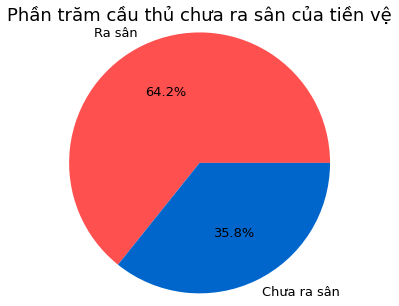

In [183]:
print("Số cầu thủ ở vị trí tiền vệ chưa ra sân: ", info_new_midfieder.shape[0])

plt.figure(figsize=(8, 5));
plt.title('Phần trăm cầu thủ chưa ra sân của tiền vệ', fontsize=18);
plt.pie((dfMidfielder['Appearances'] == 0).value_counts(),
        labels=['Ra sân', 'Chưa ra sân'],
        textprops={'fontsize': 13},
        radius=1.2, startangle=0,
        colors=['#ff5050', '#0066cc'],
        autopct='%.1f%%');

In [184]:
# Defender
info_new_defender = dfDefender[dfDefender['Appearances'] == 0]
info_new_defender

,Player name,Appearances,Goals Overview,Wins,Losses,Clean sheets,Goals conceded,Tackles,Blocked shots,Interceptions,...,Crosses,Through balls,Yellow cards,Red cards,Fouls,Offsides,Headed goals,Goals with right foot,Goals with left foot,Hit woodwork
0,Zach Abbott,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Tayo Adaramola,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Joshua Addae,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,Ryan Alebiosu,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,Ajibola Alese,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
714,Callum Rowe,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1490,Oliver Casey,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1498,Shea Charles,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1502,Dennis Cirkin,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Số cầu thủ ở vị trí hậu vệ chưa ra sân:  128


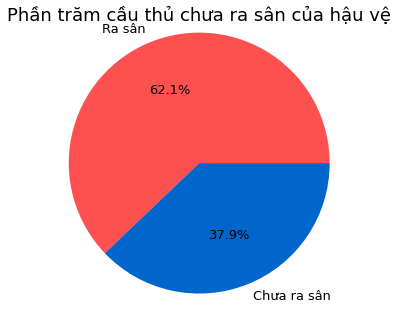

In [185]:
print("Số cầu thủ ở vị trí hậu vệ chưa ra sân: ", info_new_defender.shape[0])

plt.figure(figsize=(8, 5));
plt.title('Phần trăm cầu thủ chưa ra sân của hậu vệ', fontsize=18);
plt.pie((dfDefender['Appearances'] == 0).value_counts(),
        labels=['Ra sân', 'Chưa ra sân'],
        textprops={'fontsize': 13},
        radius=1.2, startangle=0,
        colors=['#ff5050', '#0066cc'],
        autopct='%.1f%%');

In [186]:
# Forward
info_new_forward = dfForward[dfForward['Appearances'] == 0]
info_new_forward

,Player name,Appearances,Goals Overview,Wins,Losses,Headed goals,Goals with right foot,Goals with left foot,Shots,Shots on target,...,Crosses,Yellow cards,Red cards,Fouls,Offsides,Tackles,Blocked shots,Interceptions,Clearances,Headed clearance
0,Terry Ablade,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Simon Adingra,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Victor Akinwale,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,William Alves,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17,Dominic Ballard,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20,Louie Barry,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25,Mika Biereth,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26,Harvey Blair,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36,Mason Burstow,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38,Leonardo Campana,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Số cầu thủ ở vị trí tiền đạo chưa ra sân:  54


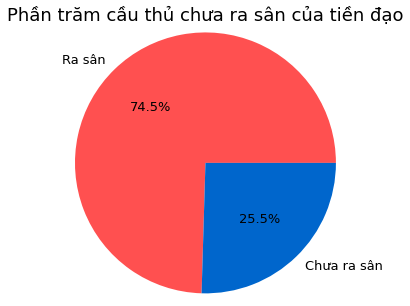

In [187]:
print("Số cầu thủ ở vị trí tiền đạo chưa ra sân: ", info_new_forward.shape[0])

plt.figure(figsize=(8, 5));
plt.title('Phần trăm cầu thủ chưa ra sân của tiền đạo', fontsize=18);
plt.pie((dfForward['Appearances'] == 0).value_counts(),
        labels=['Ra sân', 'Chưa ra sân'],
        textprops={'fontsize': 13},
        radius=1.2, startangle=0,
        colors=['#ff5050', '#0066cc'],
        autopct='%.1f%%');

In [188]:
# Keeper
info_new_keeper = dfKeeper[dfKeeper['Appearances'] == 0]
info_new_keeper

,Player name,Appearances,Wins,Losses,Punches,High claims,Catches,Sweeper clearances,Yellow cards,Red cards,Fouls,Goals
5,Brandon Austin,0,0,0,0,0,0,0,0,0,0,0
6,Ellery Balcombe,0,0,0,0,0,0,0,0,0,0,0
7,Lucas Bergström,0,0,0,0,0,0,0,0,0,0,0
9,Nathan Bishop,0,0,0,0,0,0,0,0,0,0,0
10,Nathan Baxter,0,0,0,0,0,0,0,0,0,0,0
12,Eddie Beach,0,0,0,0,0,0,0,0,0,0,0
19,Elia Caprile,0,0,0,0,0,0,0,0,0,0,0
21,Harry Christy,0,0,0,0,0,0,0,0,0,0,0
22,Matthew Cox,0,0,0,0,0,0,0,0,0,0,0
23,Billy Crellin,0,0,0,0,0,0,0,0,0,0,0


Số cầu thủ ở vị trí thủ môn chưa ra sân:  60


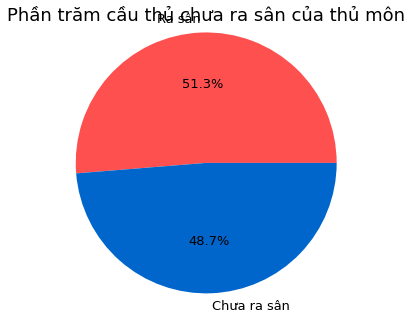

In [189]:
print("Số cầu thủ ở vị trí thủ môn chưa ra sân: ", info_new_keeper.shape[0])

plt.figure(figsize=(8, 5));
plt.title('Phần trăm cầu thủ chưa ra sân của thủ môn', fontsize=18);
plt.pie((dfKeeper['Appearances'] == 0).value_counts(),
        labels=['Ra sân', 'Chưa ra sân'],
        textprops={'fontsize': 13},
        radius=1.2, startangle=0,
        colors=['#ff5050', '#0066cc'],
        autopct='%.1f%%');

##### <p style="text-align:center"> **8.2 Phân bổ các thuộc tính** </p>

- Phân bổ các thuộc tính là số trên từng cầu thủ để các giá trị số được biểu diễn như thể nào trong bộ dữ liệu.
- Dựa trên những thông số thống kê để xác định được phân bố thuộc tính như thế nào. Ở đây nhóm không xét đến phần trăm giá trị bị thiếu vì cơ bản nhóm đã lọc bỏ trùng cho nó, như vậy thì nhóm chỉ còn xét: 
  - Giá trị min.
  - Giá trị lower quartile (phân vị 25).
  - Giá trị median (phân vị 50).
  - Giá trị upper quartile (phân vị 75).
  - Giá trị max.
  - Giá trị mean.

In [190]:
def lower_quantile(column):
    return column.quantile(q = 0.25)

def upper_quantile(column):
    return column.quantile(q = 0.75)

def mean(column):
    return column.mean()

def median(column):
    return column.median()

In [191]:
# Phân bổ giá trị cho thủ môn
keeper_numeric = dfKeeper.iloc[:, dfKeeper.columns != 'Player name']
keeper_numeric.agg([min, lower_quantile, upper_quantile, max, mean, median]).round(2)

,Appearances,Wins,Losses,Punches,High claims,Catches,Sweeper clearances,Yellow cards,Red cards,Fouls,Goals
min,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
lower_quantile,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
upper_quantile,51.0,17.00,20.00,21.00,46.00,11.00,23.00,2.00,0.00,1.00,0.00
max,391.0,210.00,134.00,199.00,414.00,164.00,288.00,13.00,2.00,8.00,1.00
mean,42.5,17.19,15.48,18.37,36.73,13.36,21.26,1.55,0.08,0.66,0.02
median,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [192]:
# Phân bổ giá trị cho hậu vệ
defender_numeric = dfDefender.iloc[:, dfDefender.columns != 'Player name']
defender_numeric.agg([min, lower_quantile, upper_quantile, max, mean, median]).round(2)

,Appearances,Goals Overview,Wins,Losses,Clean sheets,Goals conceded,Tackles,Blocked shots,Interceptions,Clearances,...,Crosses,Through balls,Yellow cards,Red cards,Fouls,Offsides,Headed goals,Goals with right foot,Goals with left foot,Hit woodwork
min,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,...,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
lower_quantile,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,...,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
upper_quantile,71.75,2.00,25.75,24.00,16.00,82.50,107.5,7.00,81.75,175.75,...,35.75,2.0,9.00,0.00,53.75,2.00,0.00,1.00,0.00,1.00
max,404.00,49.00,216.00,135.00,120.00,491.00,842.0,161.00,667.00,2935.00,...,2747.00,108.0,75.00,4.00,424.00,102.00,14.00,48.00,19.00,17.00
mean,47.97,2.08,19.96,16.77,11.84,56.64,75.8,6.59,62.12,162.99,...,73.03,2.3,6.75,0.28,36.60,2.47,0.86,0.76,0.45,0.73
median,9.00,0.00,3.00,4.00,1.00,11.00,14.0,0.00,9.00,19.00,...,1.00,0.0,1.00,0.00,7.00,0.00,0.00,0.00,0.00,0.00


In [193]:
# Phân bổ giá trị cho tiền đạo
forward_numeric = dfForward.iloc[:, dfForward.columns != 'Player name']
forward_numeric.agg([min, lower_quantile, upper_quantile, max, mean, median]).round(2)

,Appearances,Goals Overview,Wins,Losses,Headed goals,Goals with right foot,Goals with left foot,Shots,Shots on target,Hit woodwork,...,Crosses,Yellow cards,Red cards,Fouls,Offsides,Tackles,Blocked shots,Interceptions,Clearances,Headed clearance
min,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
lower_quantile,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
upper_quantile,81.75,15.0,30.00,31.25,2.00,6.25,4.00,127.50,48.00,4.00,...,57.25,6.25,0.00,53.00,22.00,52.75,35.50,20.00,24.75,12.25
max,380.00,195.0,209.00,150.00,35.00,118.00,103.00,1104.00,488.00,35.00,...,1119.00,46.00,4.00,410.00,256.00,382.00,269.00,170.00,330.00,209.00
mean,58.91,15.1,24.91,20.60,2.36,8.02,4.54,107.15,43.08,3.12,...,80.20,4.99,0.23,47.56,22.77,42.61,27.21,19.39,25.74,15.78
median,13.00,2.0,4.00,6.00,0.00,0.50,0.00,11.50,6.00,0.00,...,5.50,0.00,0.00,8.00,2.00,7.00,3.00,2.00,2.00,1.00


In [194]:
# Phân bổ giá trị cho tiền vệ:
midfielder_numeric = dfMidfielder.iloc[:, dfMidfielder.columns != 'Player name']
midfielder_numeric.agg([min, lower_quantile, upper_quantile, max, mean, median]).round(2)

,Appearances,Goals overview,Wins,Losses,Headed goals,Goals with right foot,Goals with left foot,Shots,Shots on target,Hit woodwork,...,Through balls,Accurate long balls,Yellow cards,Red cards,Fouls,Offsides,Tackles,Blocked shots,Interceptions,Clearances
min,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
lower_quantile,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
upper_quantile,72.0,5.00,27.75,27.75,0.00,2.00,1.00,73.25,20.50,1.00,...,7.00,83.00,8.00,0.00,61.75,3.00,99.75,23.00,48.75,38.75
max,600.0,60.00,309.00,144.00,9.00,41.00,43.00,625.00,231.00,29.00,...,177.00,957.00,70.00,4.00,480.00,106.00,867.00,210.00,504.00,580.00
mean,50.2,4.99,21.28,17.47,0.35,2.95,1.65,55.51,17.81,1.38,...,8.43,85.95,6.51,0.19,44.85,4.15,77.43,17.19,44.38,40.11
median,9.0,0.00,2.50,4.00,0.00,0.00,0.00,4.00,1.00,0.00,...,0.00,4.00,1.00,0.00,6.00,0.00,8.50,1.00,3.00,2.00


##### <p style="text-align:center"> **6. Câu hỏi thứ năm** </p>

---
HẾT GIAI ĐOẠN 2

# <p style="text-align:center"> **GIAI ĐOẠN 3: PHÂN TÍCH DỮ LIỆU** </p>
---
- **Về công cụ**: Sử dụng numpy và pandas, plotly để đặt và trả lời câu hỏi được đưa ra. 
---

### <p style="text-align:center"> **I. IMPORT THƯ VIỆN CẦN THIẾT** </p>

In [195]:
# Import thư viện cần thiết để thao tác dữ liệu
import pandas as pd
import numpy as np 
pd.options.mode.chained_assignment = None

# Import thư viện để trực quan những kết quả tìm hiểu được:
# !pip install plotly (Chưa có thư viện thì gỡ comment để tải)
# !pip install cufflinks --upgrade

import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.offline import init_notebook_mode, download_plotlyjs,plot,iplot

#Lấy các biến từ pha trước vào
%store -r dfMidfielder
%store -r dfKeeper
%store -r dfForward
%store -r dfDefender

no stored variable dfMidfielder
no stored variable dfKeeper
no stored variable dfForward
no stored variable dfDefender


In [196]:
# Lưu trữ các biến lại để tránh bị dính các lỗi ở các giá trị chưa được khai báo 
dfMidfielder = dfMidfielder
dfKeeper = dfKeeper
dfForward = dfForward
dfDefender = dfDefender

### <p style="text-align:center"> **II. ĐẶT VÀ TRẢ LỜI CÂU HỎI CÓ Ý NGHĨA** </p>

**Ghi chú**: Các thuộc tính có mang tiền tố average sẽ được hiểu là chỉ số trung bình trong một trận đấu của một cầu thủ. Các chỉ số này sẽ được tính bằng cách lấy chỉ số gốc chia cho tổng số lần ra sân của cầu thủ đó.

##### <p style="text-align:center">  **1. CÂU HỎI THỨ NHẤT** </p>

**Mô tả câu hỏi**: Thông thường xu hướng chơi bóng của các cầu thủ sẽ được chia làm ba loại: chủ động, trung lập và bị động. Vậy như thế nào là một cầu thủ trung lập, chủ động cũng như bị động? Và nó có ý nghĩa gì?

**Ý nghĩa:** Thông qua việc phân lớp cầu thủ này, ta có thể hiểu hơn về lối chơi của các cầu thủ và có thể giúp các huấn luyện viên có các điều chỉnh chiến thuật hoặc thậm chí là quyết đinh chuyển nhượng đội hình hợp lí.

**Cách thực hiện:** Ứng với từng vị trí, chúng ta sẽ cân nhắc các thuộc tính khác nhau để xác định xu hướng chơi bóng của các cầu thủ thuộc vị trí đó. Các bước được chia cụ thể như sau: 

*Bước 1: Xét các vị trí khác nhau sẽ có thuộc tính trung bình khác nhau.*
- Với tiền đạo: `Average shots, Average crosses, Average tackles, Average interceptions`
- Với tiền vệ: `Average crosses, Average through balls, Average passes, Average tackles, Average interceptions`
- Với hậu vệ: `Average clearances off line, Average headed clearances, Average tackles, Average interceptions`
- Với thủ môn: `Average punches, Average catches, Average high claims, Average sweeper clearance`

*Bước 2: Scale giá trị gốc về giá trị có thể tính toán được dựa trên thang điểm 10 và các chỉ số chiếm phần trăm bằng nhau.*
$$value \ scale = \frac{value}{max} \times \%\_number\_of\_this\_atribute$$

Trong đó:
- value: Giá trị của thuộc tính đang xét của cầu thủ       
- max: Giá trị lớn nhất của thuộc tính trong số các cầu thủ cùng vị trí
- \%\_number\_of\_this\_atribute: Phần trăm mà thuộc tính đó chiếm trên tổng số thuộc tính (thông thường là bằng nhau, 2 hoặc 2.5).
- value scale: Giá trị đã được tính toán lại

*Bước 3: Sau khi đã tính toán ra được "điểm số xu hướng chơi bóng" (Trend), thực hiện phân lớp như sau:*
- Bị động: $$value \leq 4 $$
- Trung lập: $$4 \le value \leq 7$$
- Chủ động: $$ value > 7 $$   

---
##### **1.1 VỊ TRÍ TIỀN ĐẠO**

In [197]:
# Tiền đạo: 

# Tiền xử lý dữ liệu: Xóa các cầu thủ chưa ra sân: 
dfForward_copy = dfForward[dfForward.Appearances != 0]

# Lấy trung bình
dfForward_copy['Average shots'] = (dfForward_copy['Shots'] / dfForward_copy['Appearances']) 
dfForward_copy['Average crosses'] = (dfForward_copy['Crosses'] / dfForward_copy['Appearances']) 
dfForward_copy['Average tackles'] = (dfForward_copy['Tackles'] / dfForward_copy['Appearances']) 
dfForward_copy['Average interceptions'] = (dfForward_copy['Interceptions'] / dfForward_copy['Appearances']) 

# Scale giá trị về: 
dfForward_copy['Average shots'] = (dfForward_copy['Average shots'] / dfForward_copy['Average shots'].max()) * 2.5
dfForward_copy['Average crosses'] = (dfForward_copy['Average crosses'] / dfForward_copy['Average crosses'].max()) * 2.5
dfForward_copy['Average tackles'] = (dfForward_copy['Average tackles'] / dfForward_copy['Average tackles'].max()) * 2.5
dfForward_copy['Average interceptions'] = (dfForward_copy['Average interceptions'] / dfForward_copy['Average interceptions'].max()) * 2.5


# Xu hướng chơi bóng: 
dfForward_copy['Trend'] = dfForward_copy['Average shots'] + dfForward_copy['Average crosses'] + \
                    dfForward_copy['Average tackles'] + dfForward_copy['Average interceptions']

# Xóa các cột đã sử dụng để tính toán ra kết quả cuối: 
dfForward_copy.drop(['Average shots', 'Average crosses', 'Average tackles', 'Average interceptions'], inplace=True, axis=1)

# Lấy danh sách chủ động:
active = dfForward_copy[dfForward_copy.Trend > 7]
passive = dfForward_copy[dfForward_copy.Trend < 4]
neutral = dfForward_copy[dfForward_copy.Trend.between(4, 7)]

Danh sách cầu thủ ở vị trí tiền đạo có lối chơi chủ động:

In [198]:
active

,Player name,Appearances,Goals Overview,Wins,Losses,Headed goals,Goals with right foot,Goals with left foot,Shots,Shots on target,...,Yellow cards,Red cards,Fouls,Offsides,Tackles,Blocked shots,Interceptions,Clearances,Headed clearance,Trend
124,Dwight McNeil,149,9,42,66,0,0,9,164,46,...,11,0,73,5,235,59,117,107,47,7.122483
158,Raphinha,65,17,24,28,0,1,16,155,49,...,10,0,53,28,85,45,58,51,35,7.550104


Danh sách cầu thủ ở vị trí tiền đạo có lối chơi bị động:

In [199]:
passive

,Player name,Appearances,Goals Overview,Wins,Losses,Headed goals,Goals with right foot,Goals with left foot,Shots,Shots on target,...,Yellow cards,Red cards,Fouls,Offsides,Tackles,Blocked shots,Interceptions,Clearances,Headed clearance,Trend
1,Tammy Abraham,89,26,36,33,3,20,1,164,68,...,2,0,56,39,25,31,12,55,45,1.996717
2,Adam Armstrong,52,3,8,32,0,1,2,71,23,...,2,0,28,4,24,19,6,10,7,2.045887
3,Adama Traoré,172,9,49,76,1,7,1,149,41,...,8,0,142,30,122,55,34,40,22,3.309401
6,Julián Álvarez,12,3,10,2,0,2,1,11,6,...,0,0,6,1,7,3,0,1,1,1.483826
8,Florin Andone,26,4,5,14,2,2,0,20,9,...,5,1,30,4,11,6,3,13,6,1.381958
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,Xande Silva,1,0,0,1,0,0,0,2,0,...,0,0,0,0,0,2,0,0,0,1.250000
211,Andrii Yarmolenko,66,8,22,27,0,0,8,53,23,...,8,0,33,17,26,11,9,9,4,1.692104
212,Nathan Young-Coombes,1,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0.000000
214,Andi Zeqiri,9,0,4,2,0,0,0,7,2,...,0,0,2,0,3,3,0,2,1,1.193566


Danh sách cầu thủ ở vị trí tiền đạo có lối chơi trung lập:

In [200]:
neutral

,Player name,Appearances,Goals Overview,Wins,Losses,Headed goals,Goals with right foot,Goals with left foot,Shots,Shots on target,...,Yellow cards,Red cards,Fouls,Offsides,Tackles,Blocked shots,Interceptions,Clearances,Headed clearance,Trend
10,Michail Antonio,209,58,80,80,21,28,10,458,174,...,24,2,240,94,153,111,136,147,75,4.785936
11,Antony,6,3,3,1,0,0,3,20,9,...,1,0,2,0,8,5,3,1,0,5.799668
15,Jordan Ayew,215,29,58,105,5,19,5,289,97,...,25,2,324,49,338,102,110,89,55,4.625980
24,Bernard,73,5,25,33,0,5,0,41,12,...,9,0,42,2,89,16,51,24,5,4.225061
33,Jarrod Bowen,109,23,42,46,2,3,16,195,65,...,6,0,53,36,105,75,71,22,11,5.479328
40,Sergi Canós,36,3,10,17,1,2,0,34,13,...,6,1,31,5,57,10,22,36,12,5.187679
45,Theo Corbeanu,1,0,0,1,0,0,0,0,0,...,0,0,0,0,2,0,1,0,0,5.436183
91,Alexander Isak,3,2,0,1,0,2,0,8,6,...,0,0,4,2,4,1,1,1,1,4.166667
96,Joelinton,117,11,38,43,1,5,5,158,57,...,23,0,142,30,172,37,70,116,80,4.363753
99,Harry Kane,297,195,166,72,35,118,40,1104,488,...,36,0,285,191,179,269,74,226,177,4.104836


Trực quan số lượng cầu thủ ở vị trí tiền đạo đã phân loại cầu thủ trên biểu đố cột:

In [201]:
df_fw_category = pd.DataFrame([active.shape[0], passive.shape[0], neutral.shape[0]], 
                            columns=['count'], index=['Active', 'Passive', 'Neutral'])

df_fw_category.iplot(kind='bar', y='count',title='Number of players from category'
                   ,xTitle='Labels',yTitle='Total', text='count', textposition='auto')


**Nhận xét:** Có rất ít cầu thủ chủ động nếu như xét theo giá trị đã scale như vậy, ngoài ra ta còn thấy những cầu thủ toàn chơi thụ động khá là nhiều, một số ít là trung lập.

##### **1.2 VỊ TRÍ TIỀN VỆ**

In [202]:
# Tiền vệ:
# Tiền xử lý dữ liệu: Xóa các cầu thủ chưa ra sân: 
dfMidfielder_copy = dfMidfielder[dfMidfielder.Appearances != 0]

# Tím trung bình các thuộc tính, các cột tính thêm phục vụ cho câu 2
dfMidfielder_copy['Average through balls'] = (dfMidfielder_copy['Through balls'] / dfMidfielder_copy['Appearances']) 
dfMidfielder_copy['Average crosses'] = (dfMidfielder_copy['Crosses'] / dfMidfielder_copy['Appearances']) 
dfMidfielder_copy['Average tackles'] = (dfMidfielder_copy['Tackles'] / dfMidfielder_copy['Appearances']) 
dfMidfielder_copy['Average interceptions'] = (dfMidfielder_copy['Interceptions'] / dfMidfielder_copy['Appearances']) 
dfMidfielder_copy['Average passes'] = (dfMidfielder_copy['Passes'] / dfMidfielder_copy['Appearances']) 
dfMidfielder_copy['Average assists'] = (dfMidfielder_copy['Assists'] / dfMidfielder_copy['Appearances']) 

# Scale giá trị về: 
dfMidfielder_copy['Average through balls'] = (dfMidfielder_copy['Average through balls'] / dfMidfielder_copy['Average through balls'].max()) * 2
dfMidfielder_copy['Average crosses'] = (dfMidfielder_copy['Average crosses'] / dfMidfielder_copy['Average crosses'].max()) * 2
dfMidfielder_copy['Average tackles'] = (dfMidfielder_copy['Average tackles'] / dfMidfielder_copy['Average tackles'].max()) * 2
dfMidfielder_copy['Average interceptions'] = (dfMidfielder_copy['Average interceptions'] / dfMidfielder_copy['Average interceptions'].max()) * 2

# Xu hướng chơi bóng: 
dfMidfielder_copy['Trend'] = dfMidfielder_copy['Average through balls'] + dfMidfielder_copy['Average crosses'] + \
                        dfMidfielder_copy['Average tackles'] + dfMidfielder_copy['Average interceptions'] + dfMidfielder_copy['Average passes']

# Xóa các cột không cần thiết: 
dfMidfielder_copy.drop(['Average through balls', 'Average crosses', 'Average tackles', 'Average interceptions'], inplace=True, axis=1)

# Lấy danh sách chủ động:
active = dfMidfielder_copy[dfMidfielder_copy.Trend > 7]
passive = dfMidfielder_copy[dfMidfielder_copy.Trend < 4]
neutral = dfMidfielder_copy[dfMidfielder_copy.Trend.between(4, 7)]

Danh sách cầu thủ ở vị trí tiền vệ có lối chơi chủ động:

In [203]:
active

,Player name,Appearances,Goals overview,Wins,Losses,Headed goals,Goals with right foot,Goals with left foot,Shots,Shots on target,...,Red cards,Fouls,Offsides,Tackles,Blocked shots,Interceptions,Clearances,Average passes,Average assists,Trend
0,Brenden Aaronson,14,1,4,7,0,1,0,19,4,...,0,8,3,24,5.0,1.0,5.0,28.571429,0.142857,30.735095
1,Tyler Adams,13,0,4,6,0,0,0,2,0,...,1,25,0,52,1.0,16.0,11.0,57.076923,0.000000,59.846848
2,Marc Albrighton,307,19,117,110,2,15,2,246,81,...,1,182,23,491,83.0,292.0,204.0,22.084691,0.143322,25.375769
3,Allan,52,0,20,23,0,0,0,14,5,...,1,67,0,154,4.0,42.0,59.0,38.711538,0.038462,40.694779
5,Dele Alli,194,51,103,53,9,32,10,337,134,...,0,209,36,275,87.0,146.0,124.0,32.015464,0.175258,34.141942
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366,Oleksandr Zinchenko,83,0,68,12,0,0,0,61,15,...,1,55,6,147,21.0,86.0,86.0,69.674699,0.096386,71.907707
367,Hakim Ziyech,51,6,24,14,0,0,6,90,32,...,0,44,9,40,34.0,23.0,11.0,26.882353,0.117647,28.992179
368,Martin Ødegaard,63,14,40,16,1,2,11,98,38,...,0,40,4,70,40.0,15.0,20.0,41.380952,0.126984,43.573879
762,Josh Brownhill,78,2,21,33,0,1,1,69,16,...,0,81,2,132,22.0,151.0,94.0,33.679487,0.051282,36.027809


Danh sách cầu thủ ở vị trí tiền vệ có lối chơi bị động:

In [204]:
passive

,Player name,Appearances,Goals overview,Wins,Losses,Headed goals,Goals with right foot,Goals with left foot,Shots,Shots on target,...,Red cards,Fouls,Offsides,Tackles,Blocked shots,Interceptions,Clearances,Average passes,Average assists,Trend
36,Mads Bidstrup,4,0,2,1,0,0,0,0,0,...,0,1,0,1,0.0,1.0,2.0,3.250000,0.0,3.524359
64,Cafú,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0.0,0.0,1.0,2.000000,0.0,2.000000
72,Daniel Chesters,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0.0,0.0,0.0,0.000000,0.0,0.000000
78,Bobby Clark,1,0,1,0,0,0,0,0,0,...,0,1,0,0,0.0,0.0,0.0,1.000000,0.0,1.000000
83,Conor Coventry,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0.0,0.0,0.0,0.000000,0.0,0.000000
95,Siriki Dembélé,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0.0,1.0,0.0,2.000000,0.0,3.097436
107,Malcolm Ebiowei,3,0,0,3,0,0,0,0,0,...,0,0,0,1,0.0,0.0,0.0,2.333333,0.0,2.767455
153,Luke Harris,2,0,1,1,0,0,0,0,0,...,0,1,0,0,0.0,0.0,0.0,3.000000,0.0,3.145266
161,George Hirst,2,0,0,2,0,0,0,3,1,...,0,0,0,0,0.0,0.0,0.0,2.500000,0.0,2.500000
185,Reda Khadra,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0.0,0.0,0.0,1.000000,0.0,1.000000


Danh sách cầu thủ ở vị trí tiền vệ có lối chơi trung lập:

In [205]:
neutral

,Player name,Appearances,Goals overview,Wins,Losses,Headed goals,Goals with right foot,Goals with left foot,Shots,Shots on target,...,Red cards,Fouls,Offsides,Tackles,Blocked shots,Interceptions,Clearances,Average passes,Average assists,Trend
11,Faustino Anjorin,1,0,1,0,0,0,0,1,0,...,0,0,0,0,0.0,0.0,0.0,7.0,0.0,7.000000
59,Bruno Jordão,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0.0,0.0,0.0,6.0,0.0,6.000000
73,Tahith Chong,5,0,3,1,0,0,0,3,1,...,0,2,0,0,1.0,0.0,1.0,5.8,0.0,5.800000
128,Tariqe Fosu-Henry,1,0,0,1,0,0,0,1,1,...,0,0,0,0,0.0,0.0,0.0,6.0,0.0,6.290532
226,James McAtee,2,0,2,0,0,0,0,1,0,...,0,1,0,0,0.0,0.0,0.0,6.5,0.0,6.500000
309,Joe Rothwell,2,0,0,2,0,0,0,0,0,...,0,1,0,0,0.0,0.0,0.0,4.0,0.0,4.000000


Trực quan hóa số lượng cầu thủ ở vị trí tiền vệ lên biểu đồ:

In [206]:
df_md_category = pd.DataFrame([active.shape[0], passive.shape[0], neutral.shape[0]], 
                            columns=['count'], index=['Active', 'Passive', 'Neutral'])

df_md_category.iplot(kind='bar', y='count',title='Number of players from category'
                   ,xTitle='Labels',yTitle='Total', text='count', textposition='auto')

##### **1.3 VỊ TRÍ HẬU VỆ** 

In [207]:
# Hậu vệ:
# Tiền xử lý dữ liệu: Xóa các cầu thủ chưa ra sân: 
dfDefender_copy = dfDefender[dfDefender.Appearances != 0]

# Tính trung bình các thuộc tính
dfDefender_copy['Average clearances off line'] = (dfDefender_copy['Clearances off line'] / dfDefender_copy['Appearances']) 
dfDefender_copy['Average headed clearances'] = (dfDefender_copy['Headed clearance'] / dfDefender_copy['Appearances']) 
dfDefender_copy['Average tackles'] = (dfDefender_copy['Tackles'] / dfDefender_copy['Appearances']) 
dfDefender_copy['Average interceptions'] = (dfDefender_copy['Interceptions'] / dfDefender_copy['Appearances']) 

# Scale giá trị về: 
dfDefender_copy['Average clearances off line'] = (dfDefender_copy['Average clearances off line'] / dfDefender_copy['Average clearances off line'].max()) * 2.5
dfDefender_copy['Average headed clearances'] = (dfDefender_copy['Average headed clearances'] / dfDefender_copy['Average headed clearances'].max()) * 2.5
dfDefender_copy['Average tackles'] = (dfDefender_copy['Average tackles'] / dfDefender_copy['Average tackles'].max()) * 2.5
dfDefender_copy['Average interceptions'] = (dfDefender_copy['Average interceptions'] / dfDefender_copy['Average interceptions'].max()) * 2.5

# Xu hướng chơi bóng: 
dfDefender_copy['Trend'] = dfDefender_copy['Average clearances off line'] + dfDefender_copy['Average headed clearances'] + \
                        dfDefender_copy['Average tackles'] + dfDefender_copy['Average interceptions']

# Xóa các cột không cần thiết: 
dfDefender_copy.drop(['Average clearances off line', 'Average headed clearances', 'Average tackles', 'Average interceptions'], inplace=True, axis=1)

# Lấy danh sách chủ động:
active = dfDefender_copy[dfDefender_copy.Trend > 7]
passive = dfDefender_copy[dfDefender_copy.Trend < 4]
neutral = dfDefender_copy[dfDefender_copy.Trend.between(4, 7)]

Danh sách cầu thủ ở vị trí hậu vệ có lối chơi chủ động:

In [208]:
active

,Player name,Appearances,Goals Overview,Wins,Losses,Clean sheets,Goals conceded,Tackles,Blocked shots,Interceptions,...,Through balls,Yellow cards,Red cards,Fouls,Offsides,Headed goals,Goals with right foot,Goals with left foot,Hit woodwork,Trend


Danh sách cầu thủ ở vị trí hậu vệ có lối chơi bị động:

In [209]:
passive

,Player name,Appearances,Goals Overview,Wins,Losses,Clean sheets,Goals conceded,Tackles,Blocked shots,Interceptions,...,Through balls,Yellow cards,Red cards,Fouls,Offsides,Headed goals,Goals with right foot,Goals with left foot,Hit woodwork,Trend
1,Tosin Adarabioyo,43,1,9,19,10,61,48,3,53,...,0,1,0,22,2,1,0,0,0,3.730101
4,Nayef Aguerd,1,0,0,1,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,2.363586
5,Rayan Aït-Nouri,54,2,14,27,10,59,111,8,40,...,1,6,0,38,5,1,0,1,0,2.580213
6,Kristoffer Ajer,30,1,10,14,6,44,38,5,31,...,2,5,0,15,0,0,1,0,0,3.023354
7,Manuel Akanji,8,0,6,2,2,8,13,4,5,...,0,1,0,8,0,0,0,0,0,2.212535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,Joe Worrall,11,0,3,6,2,15,20,0,10,...,0,4,0,13,0,0,0,0,0,3.881873
330,Ashley Young,404,49,189,107,83,421,569,161,456,...,108,75,2,424,102,0,48,1,17,2.601843
332,Jordan Zemura,11,0,3,4,3,19,21,0,10,...,0,1,0,11,0,0,0,0,0,2.935881
333,Kurt Zouma,203,11,86,74,52,230,191,22,296,...,0,14,1,120,6,10,1,0,4,3.708434


Danh sách cầu thủ hậu vệ có lối chơi trung lập:

In [210]:
neutral

,Player name,Appearances,Goals Overview,Wins,Losses,Clean sheets,Goals conceded,Tackles,Blocked shots,Interceptions,...,Through balls,Yellow cards,Red cards,Fouls,Offsides,Headed goals,Goals with right foot,Goals with left foot,Hit woodwork,Trend
8,Nathan Aké,178,15,73,72,41,241,285,23,228,...,4,19,1,116,8,8,1,6,5,4.217052
15,Ethan Ampadu,26,0,5,20,2,42,58,1,49,...,0,3,0,25,1,0,0,0,0,4.423676
22,Serge Aurier,84,5,42,21,18,84,240,11,110,...,3,5,2,105,10,2,2,1,0,4.362192
25,César Azpilicueta,335,10,188,69,115,325,842,35,538,...,29,33,2,308,17,2,8,0,3,4.535707
26,Abdul Rahman Baba,15,0,6,6,2,13,47,1,23,...,0,1,0,14,2,0,0,0,0,5.086903
42,Jan Bednarek,135,7,42,60,27,217,186,7,314,...,3,27,1,118,1,3,2,2,0,5.202321
43,Armel Bella-Kotchap,11,0,2,7,0,19,18,1,26,...,0,1,0,4,0,0,0,0,0,6.012862
53,Willy Boly,91,5,34,34,27,108,204,11,158,...,2,7,2,76,5,3,1,0,1,4.995933
61,Dan Burn,114,2,39,36,29,128,179,13,139,...,3,21,0,114,16,1,1,0,1,4.121200
63,Gary Cahill,394,28,172,135,103,491,484,66,465,...,6,41,3,278,6,10,13,4,5,4.147565


Thể hiện số lượng loại lối chơi của cầu thủ vị trí hậu vệ lên biểu đồ:

In [211]:
df_dfe_category = pd.DataFrame([active.shape[0], passive.shape[0], neutral.shape[0]], 
                            columns=['count'], index=['Active', 'Passive', 'Neutral'])

df_dfe_category.iplot(kind='bar', y='count',title='Number of players from category'
                   ,xTitle='Labels',yTitle='Total', text='count', textposition='auto')

##### **1.4 VỊ TRÍ THỦ MÔN** 

In [212]:
# Thủ môn:
# Tiền xử lý dữ liệu: Xóa các cầu thủ chưa ra sân: 
dfKeeper_copy = dfKeeper[dfKeeper.Appearances != 0]

# Tính trung bình các thuộc tính
dfKeeper_copy['Average punches'] = (dfKeeper_copy['Punches'] / dfKeeper_copy['Appearances']) 
dfKeeper_copy['Average catches'] = (dfKeeper_copy['Catches'] / dfKeeper_copy['Appearances']) 
dfKeeper_copy['Average high claims'] = (dfKeeper_copy['High claims'] / dfKeeper_copy['Appearances']) 
dfKeeper_copy['Average sweeper clearance'] = (dfKeeper_copy['Sweeper clearances'] / dfKeeper_copy['Appearances']) 

# Scale giá trị về: 
dfKeeper_copy['Average punches'] = (dfKeeper_copy['Average punches'] / dfKeeper_copy['Average punches'].max()) * 2.5
dfKeeper_copy['Average catches'] = (dfKeeper_copy['Average catches'] / dfKeeper_copy['Average catches'].max()) * 2.5
dfKeeper_copy['Average high claims'] = (dfKeeper_copy['Average high claims'] / dfKeeper_copy['Average high claims'].max()) * 2.5
dfKeeper_copy['Average sweeper clearance'] = (dfKeeper_copy['Average sweeper clearance'] / dfKeeper_copy['Average sweeper clearance'].max()) * 2.5


# Xu hướng chơi bóng: 
dfKeeper_copy['Trend'] = dfKeeper_copy['Average punches'] + dfKeeper_copy['Average catches'] + \
                        dfKeeper_copy['Average high claims'] + dfKeeper_copy['Average sweeper clearance']

# Xóa các cột không cần thiết: 
dfKeeper_copy.drop(['Average punches', 'Average catches', 'Average high claims', 'Average sweeper clearance'], inplace=True, axis=1)

# Lấy danh sách chủ động:
active = dfKeeper_copy[dfKeeper_copy.Trend > 7]
passive = dfKeeper_copy[dfKeeper_copy.Trend < 4]
neutral = dfKeeper_copy[dfKeeper_copy.Trend.between(4, 7)]

Danh sách cầu thủ ở vị trí thủ môn có lối chơi chủ động:

In [213]:
active

,Player name,Appearances,Wins,Losses,Punches,High claims,Catches,Sweeper clearances,Yellow cards,Red cards,Fouls,Goals,Trend


Danh sách cầu thủ ở vị trí thủ môn có lối chơi bị động:

In [214]:
passive

,Player name,Appearances,Wins,Losses,Punches,High claims,Catches,Sweeper clearances,Yellow cards,Red cards,Fouls,Goals,Trend
1,Alisson,150,104,17,67,64,21,99,2,1,3,1,2.9125
2,Álvaro Fernández,12,3,7,4,8,4,4,0,0,0,0,2.959011
3,Alphonse Aréola,39,5,21,27,23,5,5,2,0,1,0,2.714066
4,Kepa Arrizabalaga,86,45,24,25,38,12,33,3,0,0,0,2.182182
8,Marcus Bettinelli,7,1,4,8,1,1,5,1,0,0,0,3.873403
11,Gavin Bazunu,15,3,9,8,16,1,8,0,0,0,0,3.695799
18,Willy Caballero,36,19,6,16,21,5,17,1,0,0,0,2.836495
24,Karl Darlow,52,11,24,40,46,13,13,4,0,1,0,3.790846
25,David de Gea,391,210,86,128,203,115,107,6,0,1,0,2.531761
27,Martin Dúbravka,127,47,50,52,101,20,45,2,0,0,0,2.945314


Danh sách cầu thủ ở vị trí hậu vệ có lối chơi trung lập:

In [215]:
neutral

,Player name,Appearances,Wins,Losses,Punches,High claims,Catches,Sweeper clearances,Yellow cards,Red cards,Fouls,Goals,Trend
0,Adrián,139,57,45,57,150,53,112,10,2,5,0,4.63835
13,Asmir Begovic,256,82,106,91,400,138,181,12,0,5,1,5.474129
17,Jack Butland,87,25,36,36,84,37,73,0,0,1,0,4.622115
20,Scott Carson,146,45,66,66,161,164,23,6,1,4,0,5.324786
29,Lukasz Fabianski,331,128,134,181,414,124,136,8,1,8,0,4.488631
30,Fabri,2,0,2,0,1,1,3,0,0,0,0,4.390244
33,Paulo Gazzaniga,43,13,20,18,36,17,31,1,0,1,0,4.168085
38,Lee Grant,31,10,12,21,24,16,21,1,0,0,0,4.751672
41,Tom Heaton,116,34,55,40,96,73,53,5,0,2,0,4.095441
44,Wayne Hennessey,183,47,96,73,274,96,123,4,0,1,0,5.363771


Thể hiện số lượng loại lối chơi của cầu thủ vị trí thủ môn lên biểu đồ:

In [216]:
df_kp_category = pd.DataFrame([active.shape[0], passive.shape[0], neutral.shape[0]], 
                            columns=['count'], index=['Active', 'Passive', 'Neutral'])

df_kp_category.iplot(kind='bar', y='count',title='Number of players from category'
                   ,xTitle='Labels',yTitle='Total', text='count', textposition='auto')

#### <p style="text-align:center"> **2. CÂU HỎI THỨ HAI** </p>

**Mô tả câu hỏi:** Các câu thủ nào có những hành vi không tốt trong các trận đấu hơn cả mức trung bình?

**Ý nghĩa:** Việc này có thể giúp chấn chỉnh lại hành vi thi đấu của cầu thủ, tránh những bất lợi không đáng có cho đội bóng trong trận đấu.

**Cách thực hiện:** Dựa vào số lượng lỗi, thẻ vàng và thẻ đỏ trung bình của cầu thủ trong một trận đấu, ta có thể biết liệu cầu thủ đó có đang mắc nhiều lỗi hơn mức trung bình hay không.

*Bước 1:* Gộp tất cả các cầu thủ thành một bộ dataframe thống nhất.

*Bước 2:* Lần lượt xét các thuộc tính `Average red cards, Average yellow cards, Average fouls`.

*Bước 3:* Đưa các thuộc tính về thang điểm 10 với các chỉ số chiếm tỷ trọng điểm khác nhau (6 cho average red cards; 3 cho average yellow cards, 1 cho average fouls): $$value \ scale = \frac{value}{max} \times portion$$

Trong đó: 
- value: Giá trị của thuộc tính đang xét của cầu thủ       
- max: Giá trị lớn nhất của thuộc tính trong số các cầu thủ cùng vị trí
- portion: Tỉ lệ điểm của giá trị tương ứng (tỉ lệ càng cao thì thuộc tính đó càng có giá trị để trả lời câu hỏi)
- value scale: Giá trị đã được tính toán lại

*Bước 4:* Sau khi tính toán, nếu cầu thủ nào có chỉ số "điểm phạm lỗi" lớn hơn 5 thì đang thực hiện nhiều lỗi hơn mức cần thiết.

---

In [217]:
# Tiền xử lý dữ liệu: Gộp 4 dataframe thành 1 dataframe thống nhất:
dfPlayers_1 = pd.merge(dfMidfielder, dfKeeper, how='outer')
dfPlayers_2 = pd.merge(dfForward, dfDefender, how='outer') 
dfPlayers = pd.merge(dfPlayers_1, dfPlayers_2, how='outer') 
dfPlayers = dfPlayers[['Player name', 'Appearances', 'Yellow cards', 'Red cards', 'Fouls']]

In [218]:
# Chỉ lấy cầu thủ ra sân:
dfPlayers = dfPlayers[dfPlayers.Appearances != 0]

# Scale về chỉ số trung bình
dfPlayers['Yellow cards'] = dfPlayers['Yellow cards'] / dfPlayers['Appearances']
dfPlayers['Red cards'] = dfPlayers['Red cards'] / dfPlayers['Appearances']
dfPlayers['Fouls'] = dfPlayers['Fouls'] / dfPlayers['Appearances']

# Scale về chỉ số tỉ lệ
dfPlayers['Yellow cards'] = (dfPlayers['Yellow cards'] / dfPlayers['Yellow cards'].max()) * 3
dfPlayers['Red cards'] = (dfPlayers['Red cards'] / dfPlayers['Red cards'].max()) * 6 
dfPlayers['Fouls'] = (dfPlayers['Fouls'] / dfPlayers['Fouls'].max()) 

# Tiến hành xét điểm đánh gía chung: 
dfPlayers['Score'] = dfPlayers['Yellow cards'] + dfPlayers['Red cards'] + dfPlayers['Fouls']

# Note nhỏ: Sau khi lọc ra xong rồi tính median đồ lại.

# Danh sách cầu thủ cần chấn chỉnh hành vi thi đấu: 
get_players = dfPlayers[dfPlayers['Score'] > 5]
get_players

,Player name,Appearances,Yellow cards,Red cards,Fouls,Score
648,Luis Sinisterra,9.0,0.5,4.666667,0.309524,5.47619
859,Kalidou Koulibaly,9.0,1.0,4.666667,0.56746,6.234127
888,Konstantinos Mavropanos,7.0,0.642857,6.0,0.265306,6.908163


Biểu đồ minh họa các cầu thủ nằm trong top "hành vi không đúng" nhất:

In [219]:
fig = px.bar(get_players, x='Player name', y=['Red cards', 'Yellow cards', 'Fouls'], 
            title="Players need to correct their playing behavior")

fig.show()

#### <p style="text-align:center"> **3. CÂU HỎI THỨ BA** </p>

Câu hỏi thứ 3 sẽ tập hợp nhiều câu hỏi nhỏ có cùng cách tính: 

##### **3.1 - Vị trí tiền đạo**

**Câu hỏi nhỏ 1**: Đối với vị trí tiền đạo, có ý kiến cho rằng cầu thủ ghi càng nhiều bàn thắng thì họ họ sẽ có xu hướng chơi bóng cá nhân hơn. Bằng việc so sánh độ tương quan giữa cột giá trị average goals với 2 cột giá trị average passes và average assists, ta sẽ biết được liệu ý kiến ở trên là đúng hay sai.

**Ý nghĩa:** Thức bổ sung

**Câu hỏi nhỏ 2**: Đối với vị trí tiền đạo, có ý kiến cho rằng cầu thủ càng bỏ lỡ nhiều cơ hội ghi bàn thì họ họ sẽ có xu hướng chơi bóng đồng đội, kiến tạo nhiều hơn. Bằng việc so sánh độ tương quan giữa cột giá trị average big chances missed với 2 cột giá trị average passes và average assists, ta sẽ biết được liệu ý kiến ở trên là đúng hay sai.

**Ý nghĩa:** Thức bổ sung

In [220]:
#CODE HERE
dfForward_copy['Average passes'] =  (dfForward_copy['Passes'] / dfForward_copy['Appearances'])
dfForward_copy['Average assists'] =  (dfForward_copy['Assists'] / dfForward_copy['Appearances'])
dfForward_copy['Average big chances missed'] = (dfForward_copy['Big chances missed'] / dfForward_copy['Appearances'])

dfForward_corr = dfForward_copy[['Average passes', 'Average assists', 'Average big chances missed']].copy().corr() 

fig = px.imshow(np.array(dfForward_corr), x = dfForward_corr.columns, y = dfForward_corr.index, text_auto=True)
fig.show()

-> CÂU TRẢ LỜI

#### **3.2 - Vị trí hậu vệ**

**Câu hỏi nhỏ 3:** Đối với vị trí hậu vệ, có ý kiến cho rằng cầu thủ càng bị thủng lưới nhiều sẽ có xu hướng chơi bóng chủ động hơn. Bằng việc so sánh độ tương quan giữa cột giá trị average goals conceded với cột giá trị "điểm số xu hướng chơi bóng", ta sẽ biết được liệu ý kiến ở trên là đúng hay sai. 

**Ý nghĩa:** Việc này sẽ giúp công tác chuẩn bị tâm lí thi đấu với các cầu thủ sẽ được cải thiện.

**Câu hỏi nhỏ 4:** Đối với vị trí hậu vệ, có ý kiến cho rằng các cầu thủ nên giảm thiểu số lượng chuyền bóng để ít mắc lỗi hơn dẫn đến bàn thắng cho đối phương hơn. Bằng việc so sánh độ tương quan giữa cột giá trị average passes với cột giá trị average errors leading to goal, ta sẽ biết được liệu ý kiến ở trên là đúng hay sai. 

**Ý nghĩa:** Việc này sẽ giúp điều chỉnh lối đá của cầu thủ nhắm tăng khả năng phòng thủ của đội bóng.

In [221]:
dfDefender_copy['Average goals conceded'] =  (dfDefender_copy['Goals conceded'] / dfDefender_copy['Appearances'])
dfDefender_copy['Average passes'] = (dfDefender_copy['Passes'] / dfDefender_copy['Appearances'])
dfDefender_copy['Average error leading to goal'] = (dfDefender_copy['Errors leading to goal'] / dfDefender_copy['Appearances'])

dfDefender_coor = dfDefender_copy[['Average passes', 'Average error leading to goal', 
                                    'Trend', 'Average goals conceded']].copy().corr() 

fig = px.imshow(np.array(dfDefender_coor), x = dfDefender_coor.columns, y = dfDefender_coor.index, text_auto=True)
fig.show()

-> CÂU TRẢ LỜI

##### **3.3 - Vị trí tiền vệ:**

**Câu hỏi 5:** Đối với vị trí tiền vệ, hầu hết chúng ta có thể nghĩ tới việc cầu thủ ra sân càng nhiều thì sẽ có nhiều kinh nghiệm và chất lượng chơi bóng của cầu thủ đó sẽ tốt hơn. Bằng việc so sánh độ tương quan giữa cột giá trị appearance với 2 cột giá trị crosses accuracy và through ball accuracy, ta sẽ xác minh được quan điểm trên. 

**Ý nghĩa**: Điều này sẽ có lợi với việc quyết định giữ lại các cầu thủ gạo cội hay ưu tiên bồi dưỡng các lứa cầu thủ trẻ hơn.

**Câu hỏi 6:** Đối với vị trí tiền vệ, có ý kiến cho rằng việc những đường chuyền vượt tuyến(through ball) của các tiền vệ là những tình huống tạo ra độ nguy hiểm cao đối với đối phương. Bằng việc so sánh độ tương quan giữa cột giá trị average through balls với cột giá trị average big chances created, ta sẽ biết liệu ý kiến trên là đúng hay sai. 

**Ý nghĩa:** Điều này sẽ giúp cho các đội bóng có cách đối phó với lối chơi của từng cầu thủ tiền vệ.

In [222]:
dfMidfielder_copy['Average through balls'] = (dfMidfielder_copy ['Through balls'] / dfMidfielder_copy ['Appearances'])
dfMidfielder_copy['Average big chances created'] = (dfMidfielder_copy ['Big chances created'] / dfMidfielder_copy ['Appearances'])

dfMidfielder_coor = dfMidfielder_copy[['Appearances', 'Cross accuracy', 'Through balls',
                                    'Average through balls', 'Average big chances created']].copy().corr() 


fig = px.imshow(np.array(dfMidfielder_coor), x = dfMidfielder_coor.columns, y = dfMidfielder_coor.index, text_auto=True)
fig.show()

THỨC TRẢ LỜI

#### <p style="text-align:center"> **5. CÂU HỎI THỨ TƯ** <p>

**Mô tả câu hỏi:** Đội hình hoàn hảo là đội hình có các vị trí bao gồm tiền đạo, tiền vệ, hậu vệ, thủ môn đều có các chỉ số tốt dựa trên thông số thống kê được. Vậy, để xây dựng một đội hình hoàn hảo thì huấn luyện viên chọn ra các thông số tốt nhất đến từ các vị trí khác nhau. Làm sao để chọn được các cầu thủ có thông số tốt nhất để xây dựng đội hình?

**Mục đích**: Các huấn luyện viên có thể dùng câu hỏi này để tuyển chọn các cầu thủ tốt nhất vào câu lạc bộ của mình khi họ hết hợp đồng với các câu lạc bộ khác. Việc chọn cầu thủ tốt có thể sẽ xây dựng nên một đội hình mạnh, xây dựng chiến thuật được dễ dàng và nhận được nhiều bàn thắng hơn.

**Cách thực hiện:**
- *Bước 1: Chọn top 5 cầu thủ ở vị trí tiền vệ. Các cầu thủ ở vị trí tiền vệ được đánh giá qua số bàn thắng (Goals overview) và tổng số lần kiên tạo của họ (Assists)* .

In [223]:
# Tiền vệ 
# Lấy ra top 5 người có bàn thắng cao nhất:
dfMidfielder_top =  dfMidfielder[dfMidfielder['Appearances'] != 0]
dfMidfielder_scores = dfMidfielder_top.nlargest(5, ['Goals overview'])

dfMidfielder_scores.iplot(kind='bar',x='Player name',y='Goals overview', title='Top Goalscorers', 
                        xTitle='Players', yTitle='Goals',color='red');

In [224]:
# Lấy ra top 5 người có chỉ số kiến tạo cao nhất:
dfMidfielder_assists = dfMidfielder_top.nlargest(5, ['Assists'])

dfMidfielder_assists.iplot(kind='bar', x='Player name', y='Assists', title='Top Assists', 
                        xTitle='Players', yTitle='Assists',color='red');
                        

**Nhận xét:** Ta vẫn thấy 4 người Kevin De Bruyne, James Milner, Christian Eriksen, Juan Mata vẫn nằm trong top bàn thắng và top kiến tạo. Vậy, để có cái nhìn toản cảnh hơn, nhóm sẽ plot biểu đồ biểu thị sự liên quan đến tiêu chí ta đang chọn (bao gồm assists và goals). 

In [225]:
dfMidfielder_top['Involvements'] = dfMidfielder_top['Goals overview'] + dfMidfielder_top['Assists']
involvements =  dfMidfielder_top.nlargest(5, 'Involvements')

# involvements.plot(kind='line', x='Player name', y='Involvements', xlabel='Name', 
#                         ylabel='Goal Involvements', color='red', figsize=(10, 10), marker='X');

involvements.iplot(x='Player name',y='Involvements',title='Players with highest Goal Involvements'
                   ,xTitle='Players',yTitle='Goal Involvements')

**Kết luận**: Như vậy, với vị trí là tiền vệ, ta có thể chọn được 4 người có chỉ số bàn thắng cũng như kiến tạo toàn diện nhất là Kevin De Bruyne, James Milner, Christian Eriksen, Juan Mata.

- *Bước 2: Với vị trí tiền đạo, ta cũng làm tương tự như vị trí tiền vệ*.

In [226]:
# Tiền đạo
# Lấy ra top 5 người có chỉ số bàn thắng cao nhất:
dfForward_top =  dfForward[dfForward['Appearances'] != 0]
dfForward_scores = dfForward_top.nlargest(5, ['Goals Overview'])

dfForward_scores.iplot(kind='bar',x='Player name',y='Goals Overview', title='Top Goalscorers', 
                        xTitle='Players', yTitle='Goals',color='red');

In [227]:
# Lấy ra top 5 người có chỉ số kiến tạo cao nhất
dfForward_assists = dfForward_top.nlargest(5, ['Assists'])

dfForward_assists.iplot(kind='bar', x='Player name', y='Assists', title='Top Assists', 
                        xTitle='Players', yTitle='Assists',color='red');

In [228]:
dfForward['Involvements'] = dfForward['Goals Overview'] + dfForward['Assists']
involvements =  dfForward.nlargest(5, 'Involvements')

involvements.iplot(x='Player name',y='Involvements',title='Players with highest Goal Involvements'
                   ,xTitle='Players',yTitle='Goal Involvements')

**Kết luận**: Từ biểu đồ đường, ta lấy 3 người đang nằm trong dốc ở mức chấp nhận được là Harry Kane, Jamie Vardy, Mohamed Salah.

- ***Bước 3**: Mặc dù ta có thể dùng thuộc tính "Clean sheets" để thực hiện cho bước này nhưng có thể nó sẽ không cho ta cái nhìn tổng quan hơn về các hậu vệ. Mặc dù "Clean sheets" nhiều hơn đồng nghĩa với việc hiệu suất phòng ngự chắc chắn hơn nhưng nó lại không cung cấp cho ta thông tin gì về số bàn thúa trong các trận đấu khác. Nhiều bàn thua hơn trong một trận đấu thì phản ánh hàng phòng thủ kém.*
  - *Do đó, ở bước 3 này, ta sẽ thực hiện dựa trên thuộc tính số bàn thua mỗi trận được tính bằng "Goals conceded" chia với số lần ra sân của cầu thủ đó. Và tất nhiên số lần ra sân phải thỏa mãn ngưỡng nào đó cho trước để đánh gía công tâm nhất.*

In [229]:
# Hậu vệ:
dfDefender_top = dfDefender[dfDefender['Appearances'] > 30]
dfDefender_top['Conceded per game'] = dfDefender_top['Goals conceded'] / dfDefender_top['Appearances']
least_conceded = dfDefender_top.nsmallest(5, 'Conceded per game')

least_conceded.iplot(kind='bubble',x='Player name',y='Conceded per game',size='Clean sheets', title='Goals conceded per game')

**Nhận xét**: Biểu đồ bong bóng ở trên thể hiện màn trình diễn xuất sắc của các cầu thủ. Với chiều rộng của bong bóng mô tả số trận giữ sạch lưới. Vì vậy, ta có thể chọn ra được các cầu thủ để thủng lưới ít bàn hơn mỗi trận và giữ sạch lưới nhiều hơn là: Aymetric, João Cancelo, Joe Gomez.

- ***Bước 4:** Với vị trí thủ môn, ta thực hiện tương tự như vị trí hậu vệ. Nhưng thay vì chiều rộng bong bóng mô tả "clean sheets" thì chiều rộng mô tả số lần giữ lưới an toàn (saves).*

In [ ]:
# Thủ môn
dfKeeper_top = dfKeeper[dfKeeper['Appearances'] >= 30]
dfKeeper_top['Conceded per game'] = (dfKeeper_top['Goals conceded'] / dfKeeper_top['Appearances']) 
least_conceded = dfKeeper_top.nsmallest(5, 'Conceded per game')

least_conceded.iplot(kind='bubble',x='Player name',y='Conceded per game',size='Saves', title='Goals conceded per game')

**Nhận xét:** Từ biểu đồ, ta có thể lấy được Alisson, Hugo Lioris và Ederson.

**Kết luận cuối:**
- Với tiền đạo ta có thể chọn được các cầu thủ: **Kevin De Bruyne, James Milner, Christian Eriksen, Juan Mata.**
- Với tiền vệ ta có thể chọn được các cầu thủ: **Harry Kane, Jamie Vardy, Mohamed Salah.**
- Với hậu vệ ta có thể chọn được các cầu thủ: **Aymetric, João Cancelo, Joe Gomez.**
- Với thủ môn ta có thể chọn được các cầu thủ: **Alisson, Hugo Lioris và Ederson.**

#### <p style="text-align:center"> **6. CÂU HỎI THỨ NĂM** <p>

**Mô tả câu hỏi:** Trong mô hình có bao nhiêu cầu thủ có khả năng không đúng với vị trí bản thân và gợi ý yêu cầu chuyển đổi?

**Mục đích**: Các huấn luyện viên có thể dùng câu hỏi này để tuyển chọn các cầu thủ dá ở vị trí phù hợp nhất với bản thân nhằm tăng khả năng thích ứng của đội hìnhh và chọn .



- **Bước 1:** Gộp lại các tệp dữ liệu từ 4 DataFrame. Sau đó chọn các thuộc tính 'Player name', 'Appearances', 'Shots', 'Goals Overview', 'Average assists','Average through balls', 'Average big chances created'

In [241]:
dfPlayers.dtypes

Player name                       object
Appearances                       object
Goals overview                   float64
Wins                              object
Losses                            object
Headed goals                     float64
Goals with right foot            float64
Goals with left foot             float64
Shots                            float64
Shots on target                  float64
Hit woodwork                     float64
Assists                          float64
Passes                           float64
Big chances created              float64
Crosses                          float64
Cross accuracy                   float32
Through balls                    float64
Accurate long balls              float64
Yellow cards                      object
Red cards                         object
Fouls                             object
Offsides                         float64
Tackles                          float64
Blocked shots                    float64
Interceptions   

In [243]:
# Tiền xử lý dữ liệu: Gộp 4 dataframe đã tính toán ở câu 1  thành 1 dataframe thống nhất:
dfPlayers_1 = pd.merge(dfMidfielder_copy, dfKeeper_copy, how='outer')
dfPlayers_2 = pd.merge(dfForward_copy, dfDefender_copy, how='outer') 
dfPlayers = pd.merge(dfPlayers_1, dfPlayers_2, how='outer') 
dfPlayers = dfPlayers[['Player name', 'Appearances','Shots','Goals Overview','Average assists','Average through balls','Average big chances created']]
dfPlayers

,Player name,Appearances,Shots,Goals Overview,Average assists,Average through balls,Average big chances created
0,Brenden Aaronson,14.0,19.0,NaN,0.142857,0.214286,0.357143
1,Tyler Adams,13.0,2.0,NaN,0.000000,0.076923,0.076923
2,Marc Albrighton,307.0,246.0,NaN,0.143322,0.117264,0.228013
3,Allan,52.0,14.0,NaN,0.038462,0.038462,0.000000
4,Dele Alli,194.0,337.0,NaN,0.175258,0.371134,0.247423
...,...,...,...,...,...,...,...
650,Zanka,78.0,NaN,4.0,NaN,NaN,NaN
651,Jordan Zemura,11.0,NaN,0.0,NaN,NaN,NaN
652,Kurt Zouma,203.0,NaN,11.0,NaN,NaN,NaN
653,Craig Cathcart,183.0,NaN,5.0,NaN,NaN,NaN


In [244]:
df_numeric = dfPlayers.iloc[:, dfPlayers.columns != 'Player name']
df_numeric.agg([min, lower_quantile, upper_quantile, max, mean, median]).round(2)

,Appearances,Shots,Goals Overview,Average assists,Average through balls,Average big chances created
min,1.00,0.00,0.00,0.00,0.00,0.00
lower_quantile,11.00,6.00,0.00,0.00,0.00,0.00
upper_quantile,119.00,149.50,9.00,0.10,0.17,0.14
max,600.00,1104.00,195.00,0.48,0.85,0.65
mean,78.85,109.76,10.61,0.07,0.12,0.10
median,49.00,42.00,2.00,0.05,0.07,0.07


- **Bước 2:** Lấy các thuộc tính đã chọn phân loại ra các thuộc tính quyết định cho từng vị tri khả thi cho cầu thủ nếu cần thay đổi.